# Titanic Kaggle Challenge

The Titanic challenge hosted by Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.

In particular, this notebook is taken from https://www.ahmedbesbes.com/blog/kaggle-titanic-competition as another version of Titanic Challenge, in order to study the difference and improve my result.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

# EDA 
## Load Data and General Overview

I use two different datasets, where one is only to better visualize some data. The first is the original, i.e. `data`; `data_violin` is used to make better violin graph indeed. 

In [2]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data_violin = pd.read_csv('data/train.csv')
data_violin["Survived"].replace(0,"Dead", inplace=True)
data_violin["Survived"].replace(1,"Survived", inplace=True)
data_violin["Embarked"].replace("C","Cherbourg", inplace=True)
data_violin["Embarked"].replace("Q","Queenstown", inplace=True)
data_violin["Embarked"].replace("S","Southampton", inplace=True)

(891, 12)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead. The is the variable we're going to predict.

The other variables describe the passengers. They are the features.

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
* The Name of the passeger
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values:
    1. S = Southampton,
    2. C = Cherbourg,
    3. Q = Queenstown

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Filling Age 
# data['Age'] = data['Age'].fillna(data['Age'].median())

## Targed Analysis
### Targed by Sex

Let's visualize survival based on the gender.

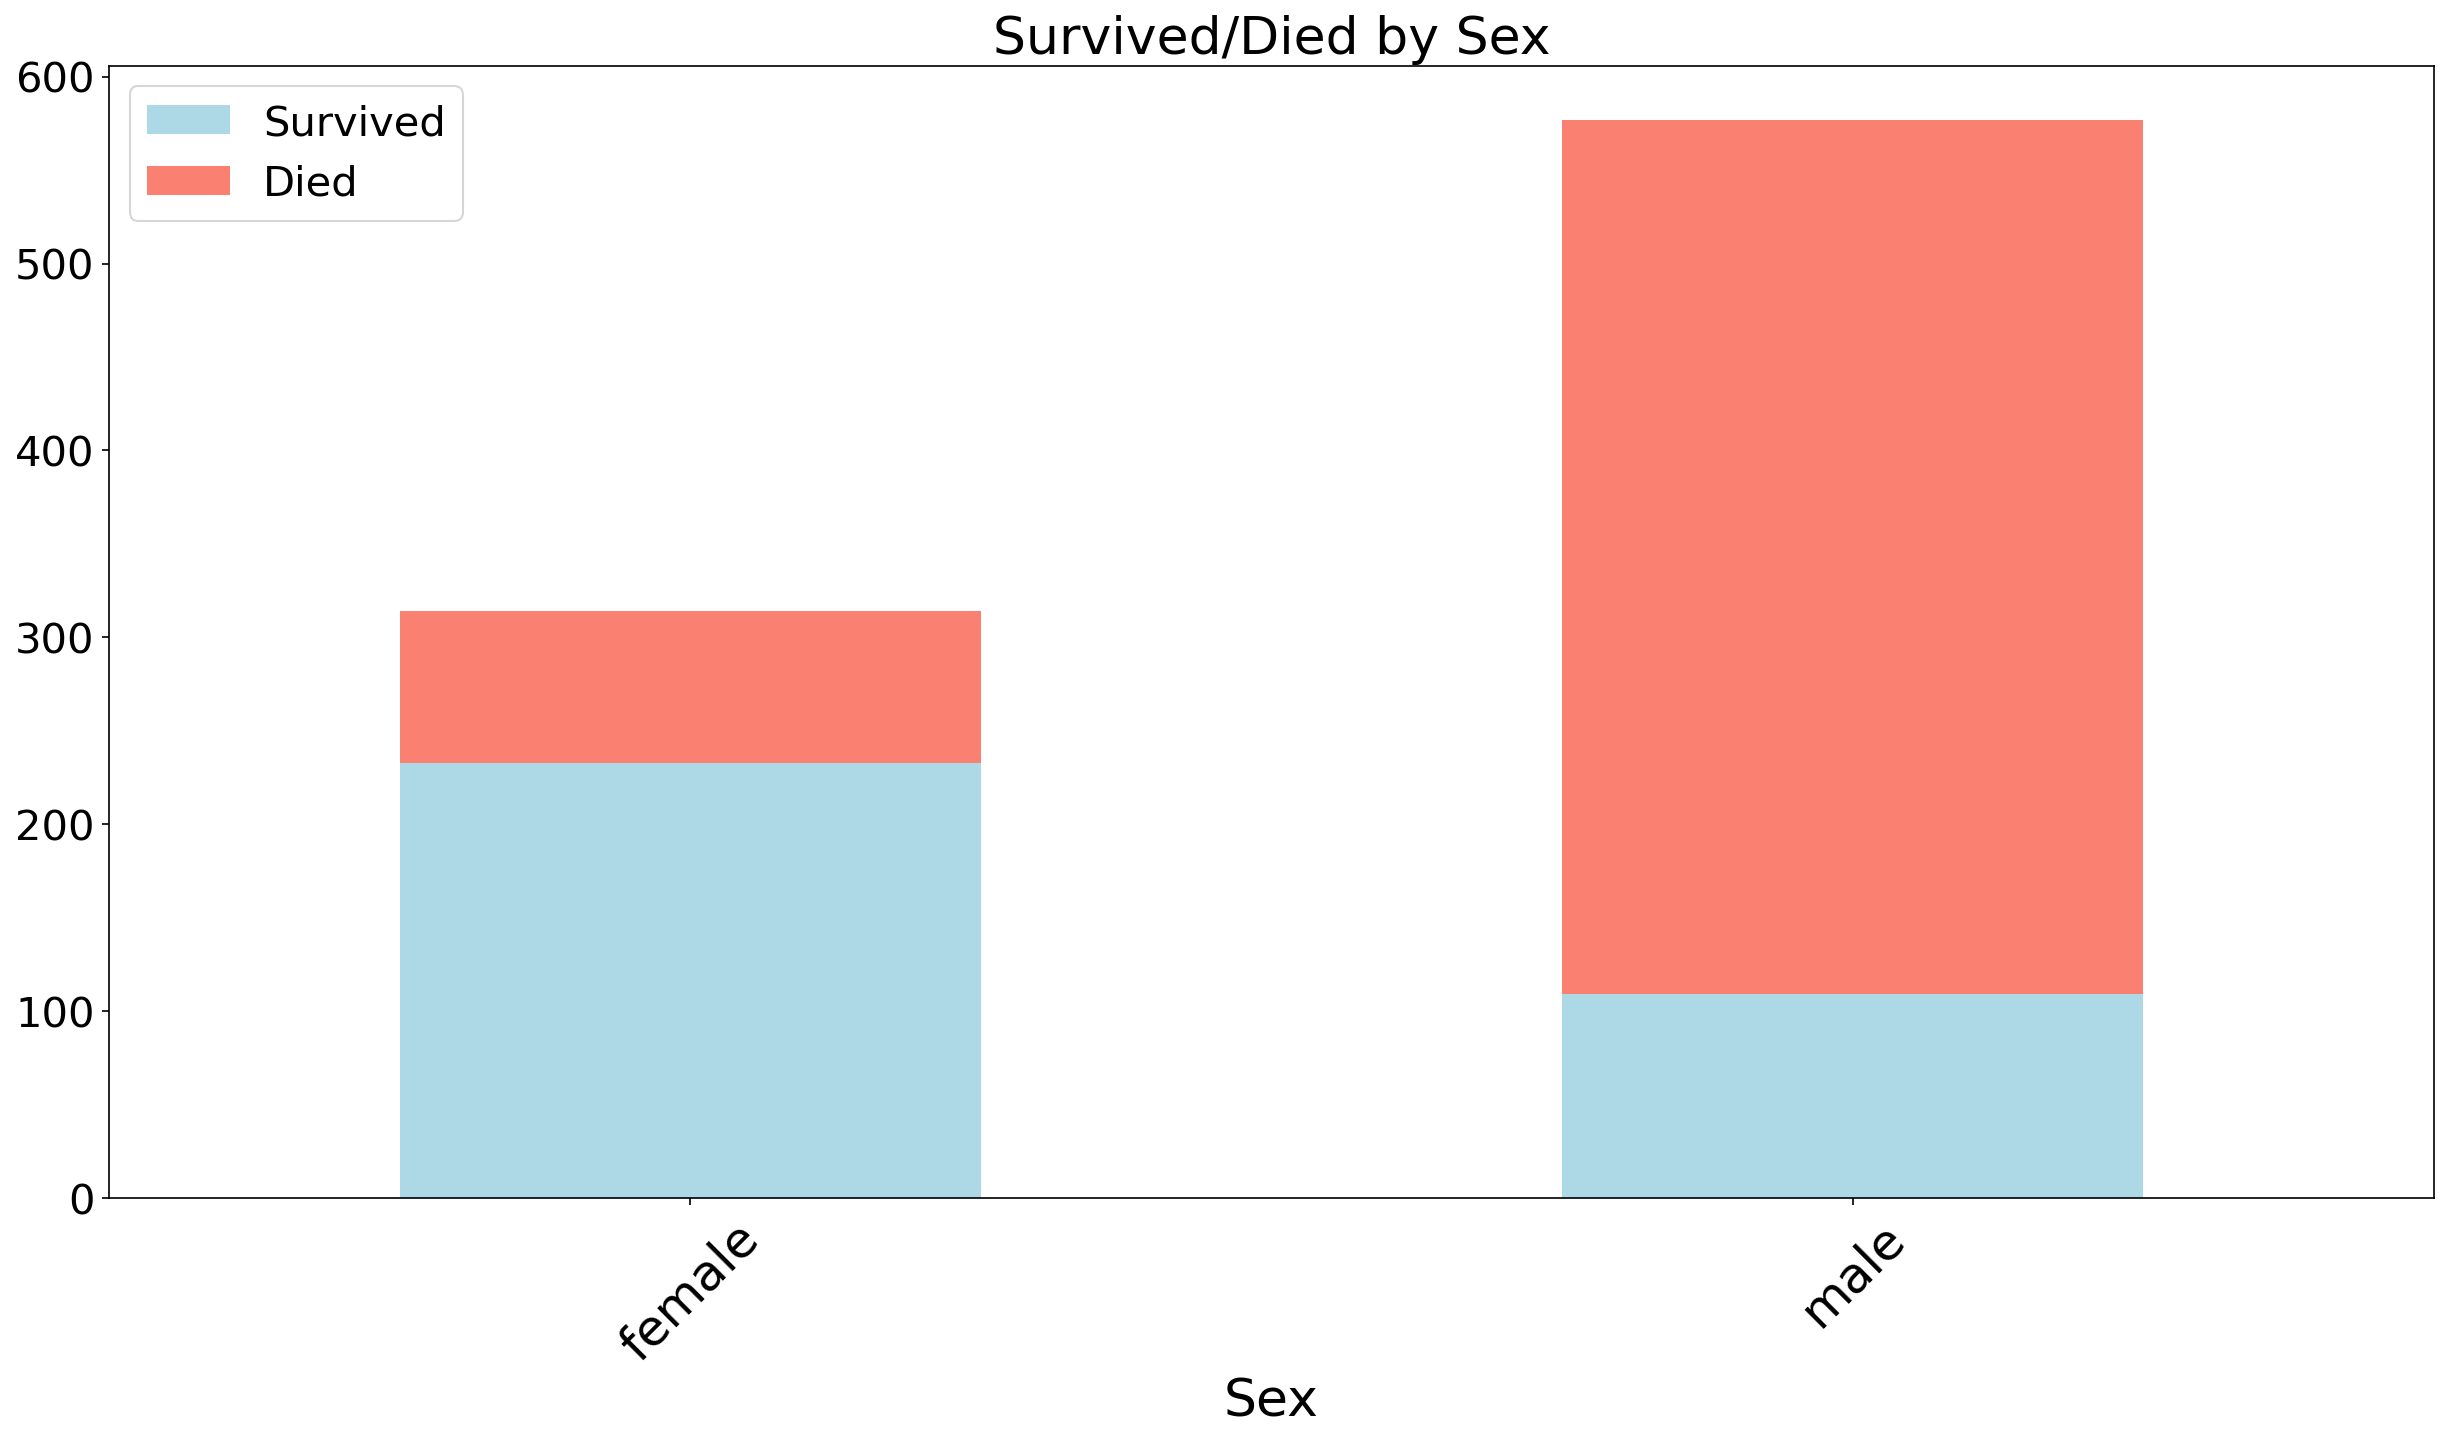

In [6]:
data['Died'] = 1 - data['Survived']
ax = data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', 
                                                               figsize=(20, 10), 
                                                               stacked=True, 
                                                               color=["lightblue", "salmon"]);
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel('Sex', fontsize=25)
ax.set_title('Survived/Died by Sex', fontsize=25)
ax.tick_params(axis="y", labelsize=20)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=24);

It looks like male passengers are more likely to succumb.

Let's plot the same graph but with ratio instead.

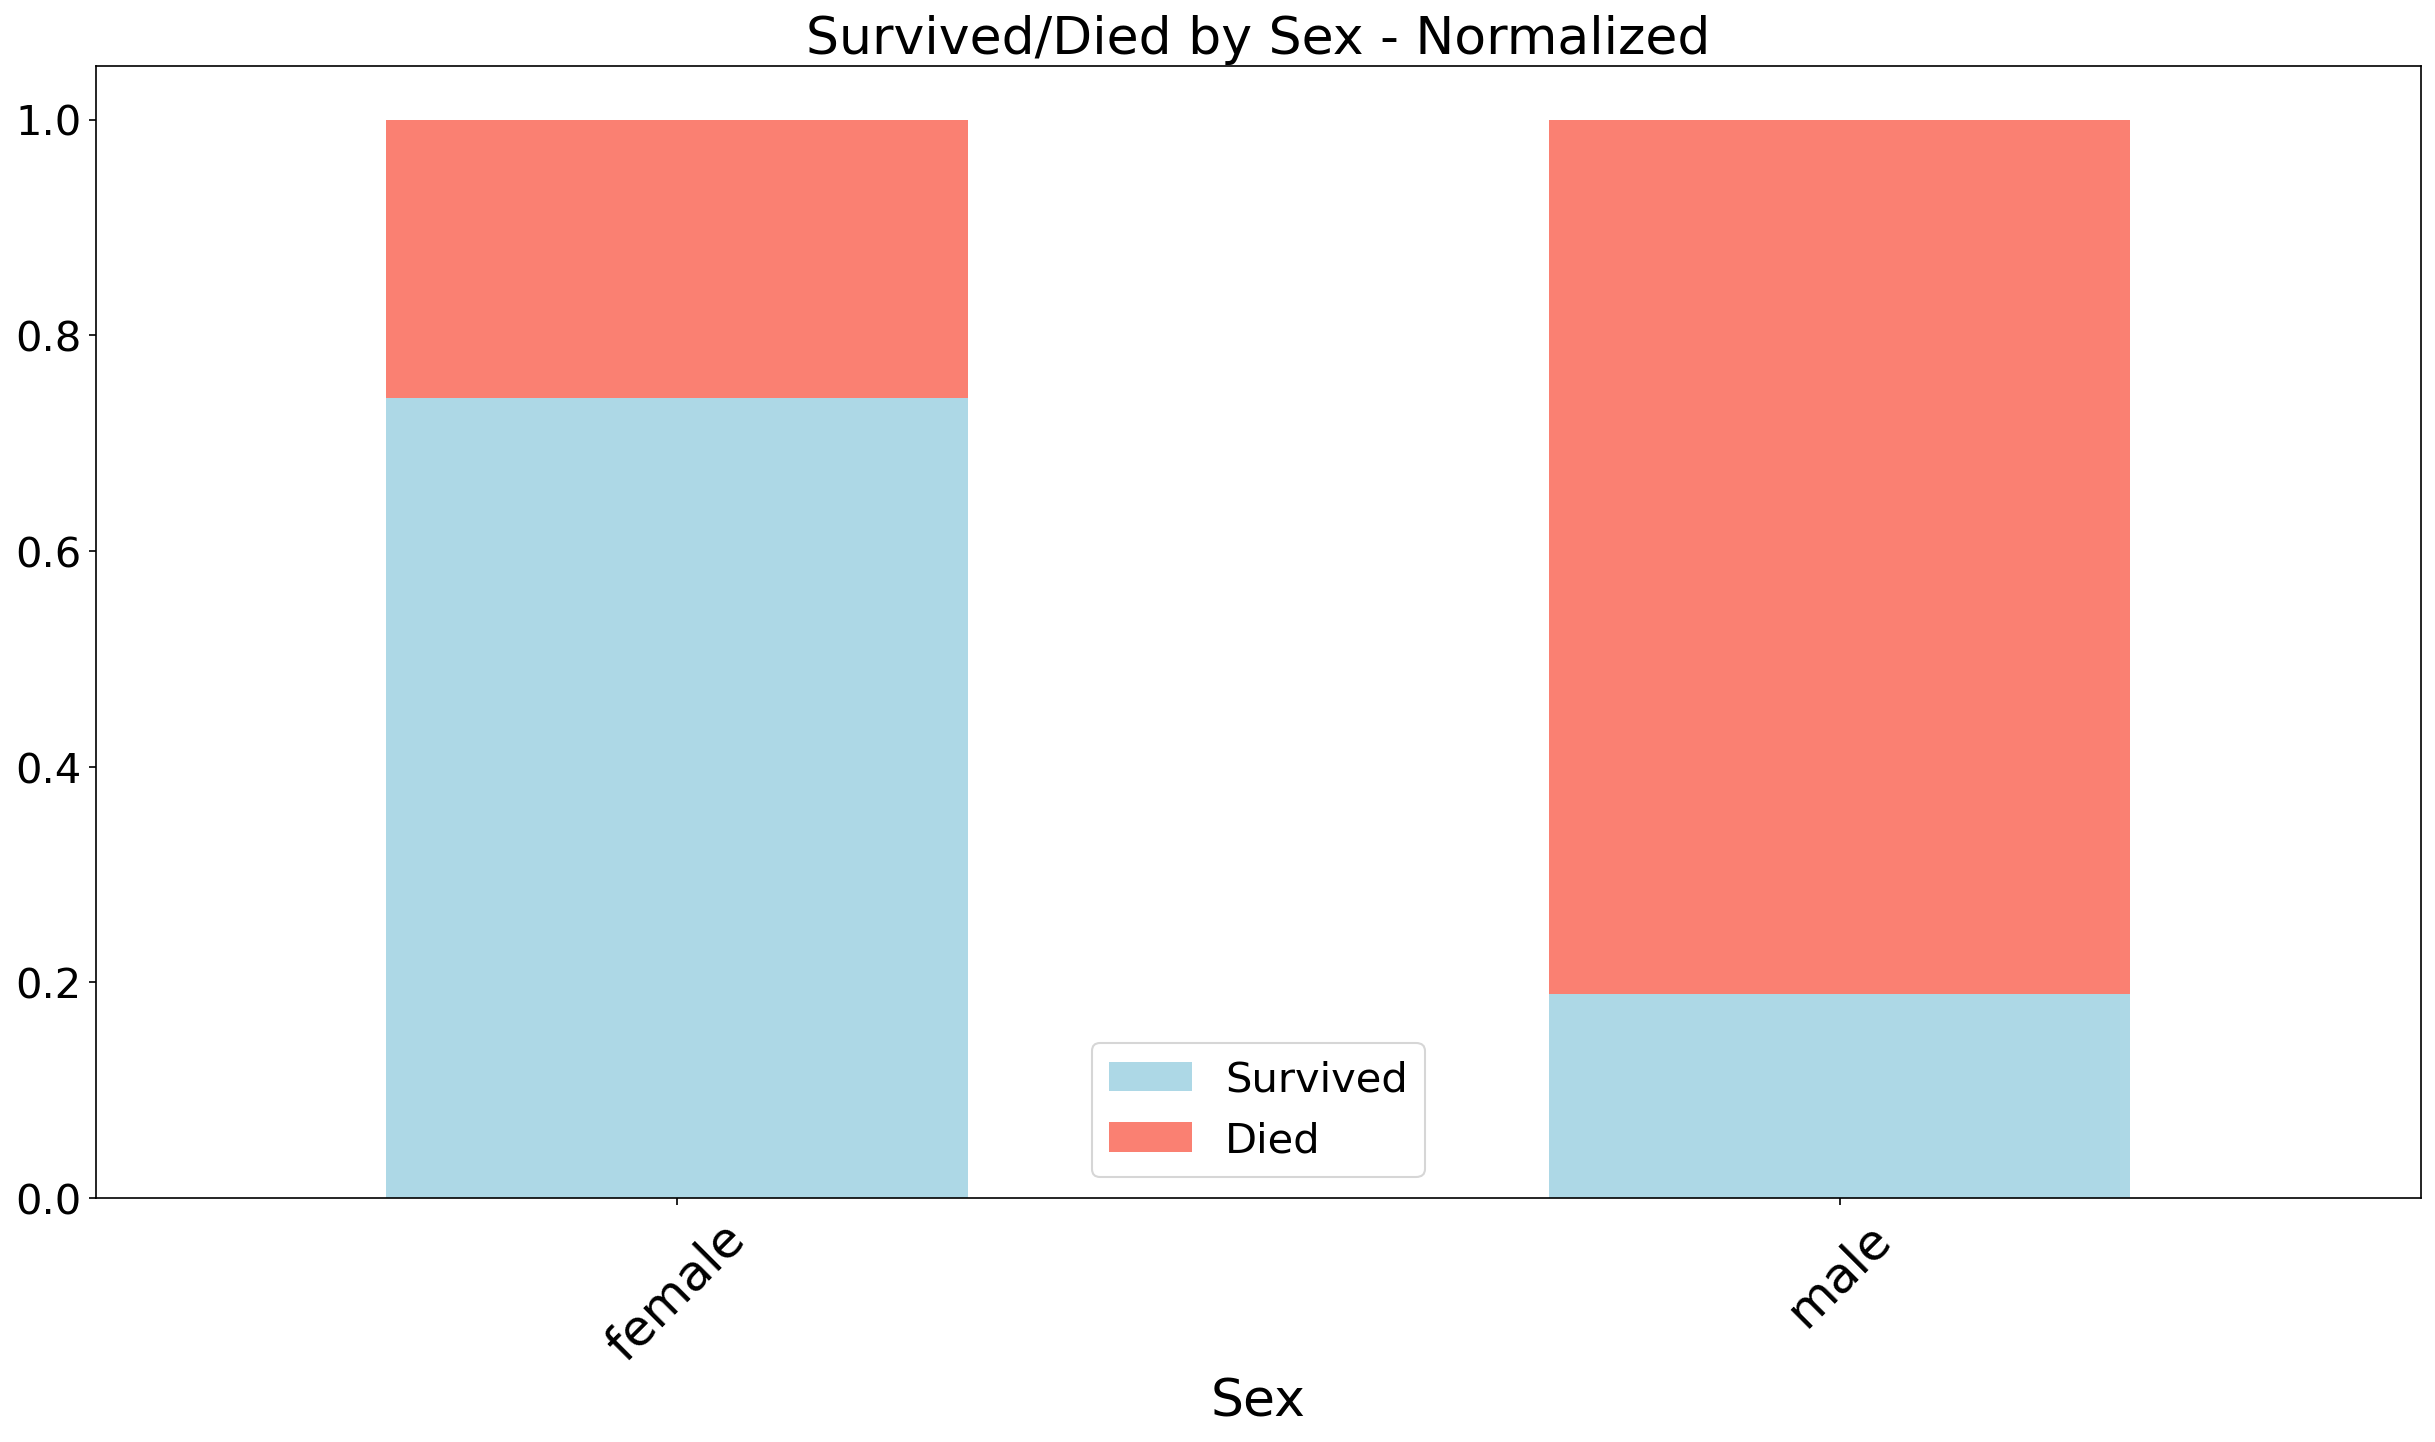

In [7]:
ax = data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', 
                                                           figsize=(20, 10), 
                                                           stacked=True, 
                                                           color=["lightblue", "salmon"]);
ax.tick_params(axis="x", labelsize=20)
ax.set_xlabel('Sex', fontsize=25)
ax.set_title('Survived/Died by Sex - Normalized', fontsize=25)
ax.tick_params(axis="y", labelsize=20)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=24);

The Sex variable seems to be a discriminative feature. Women are more likely to survive.

### Target by Age

Let's now correlate the survival with the age variable.


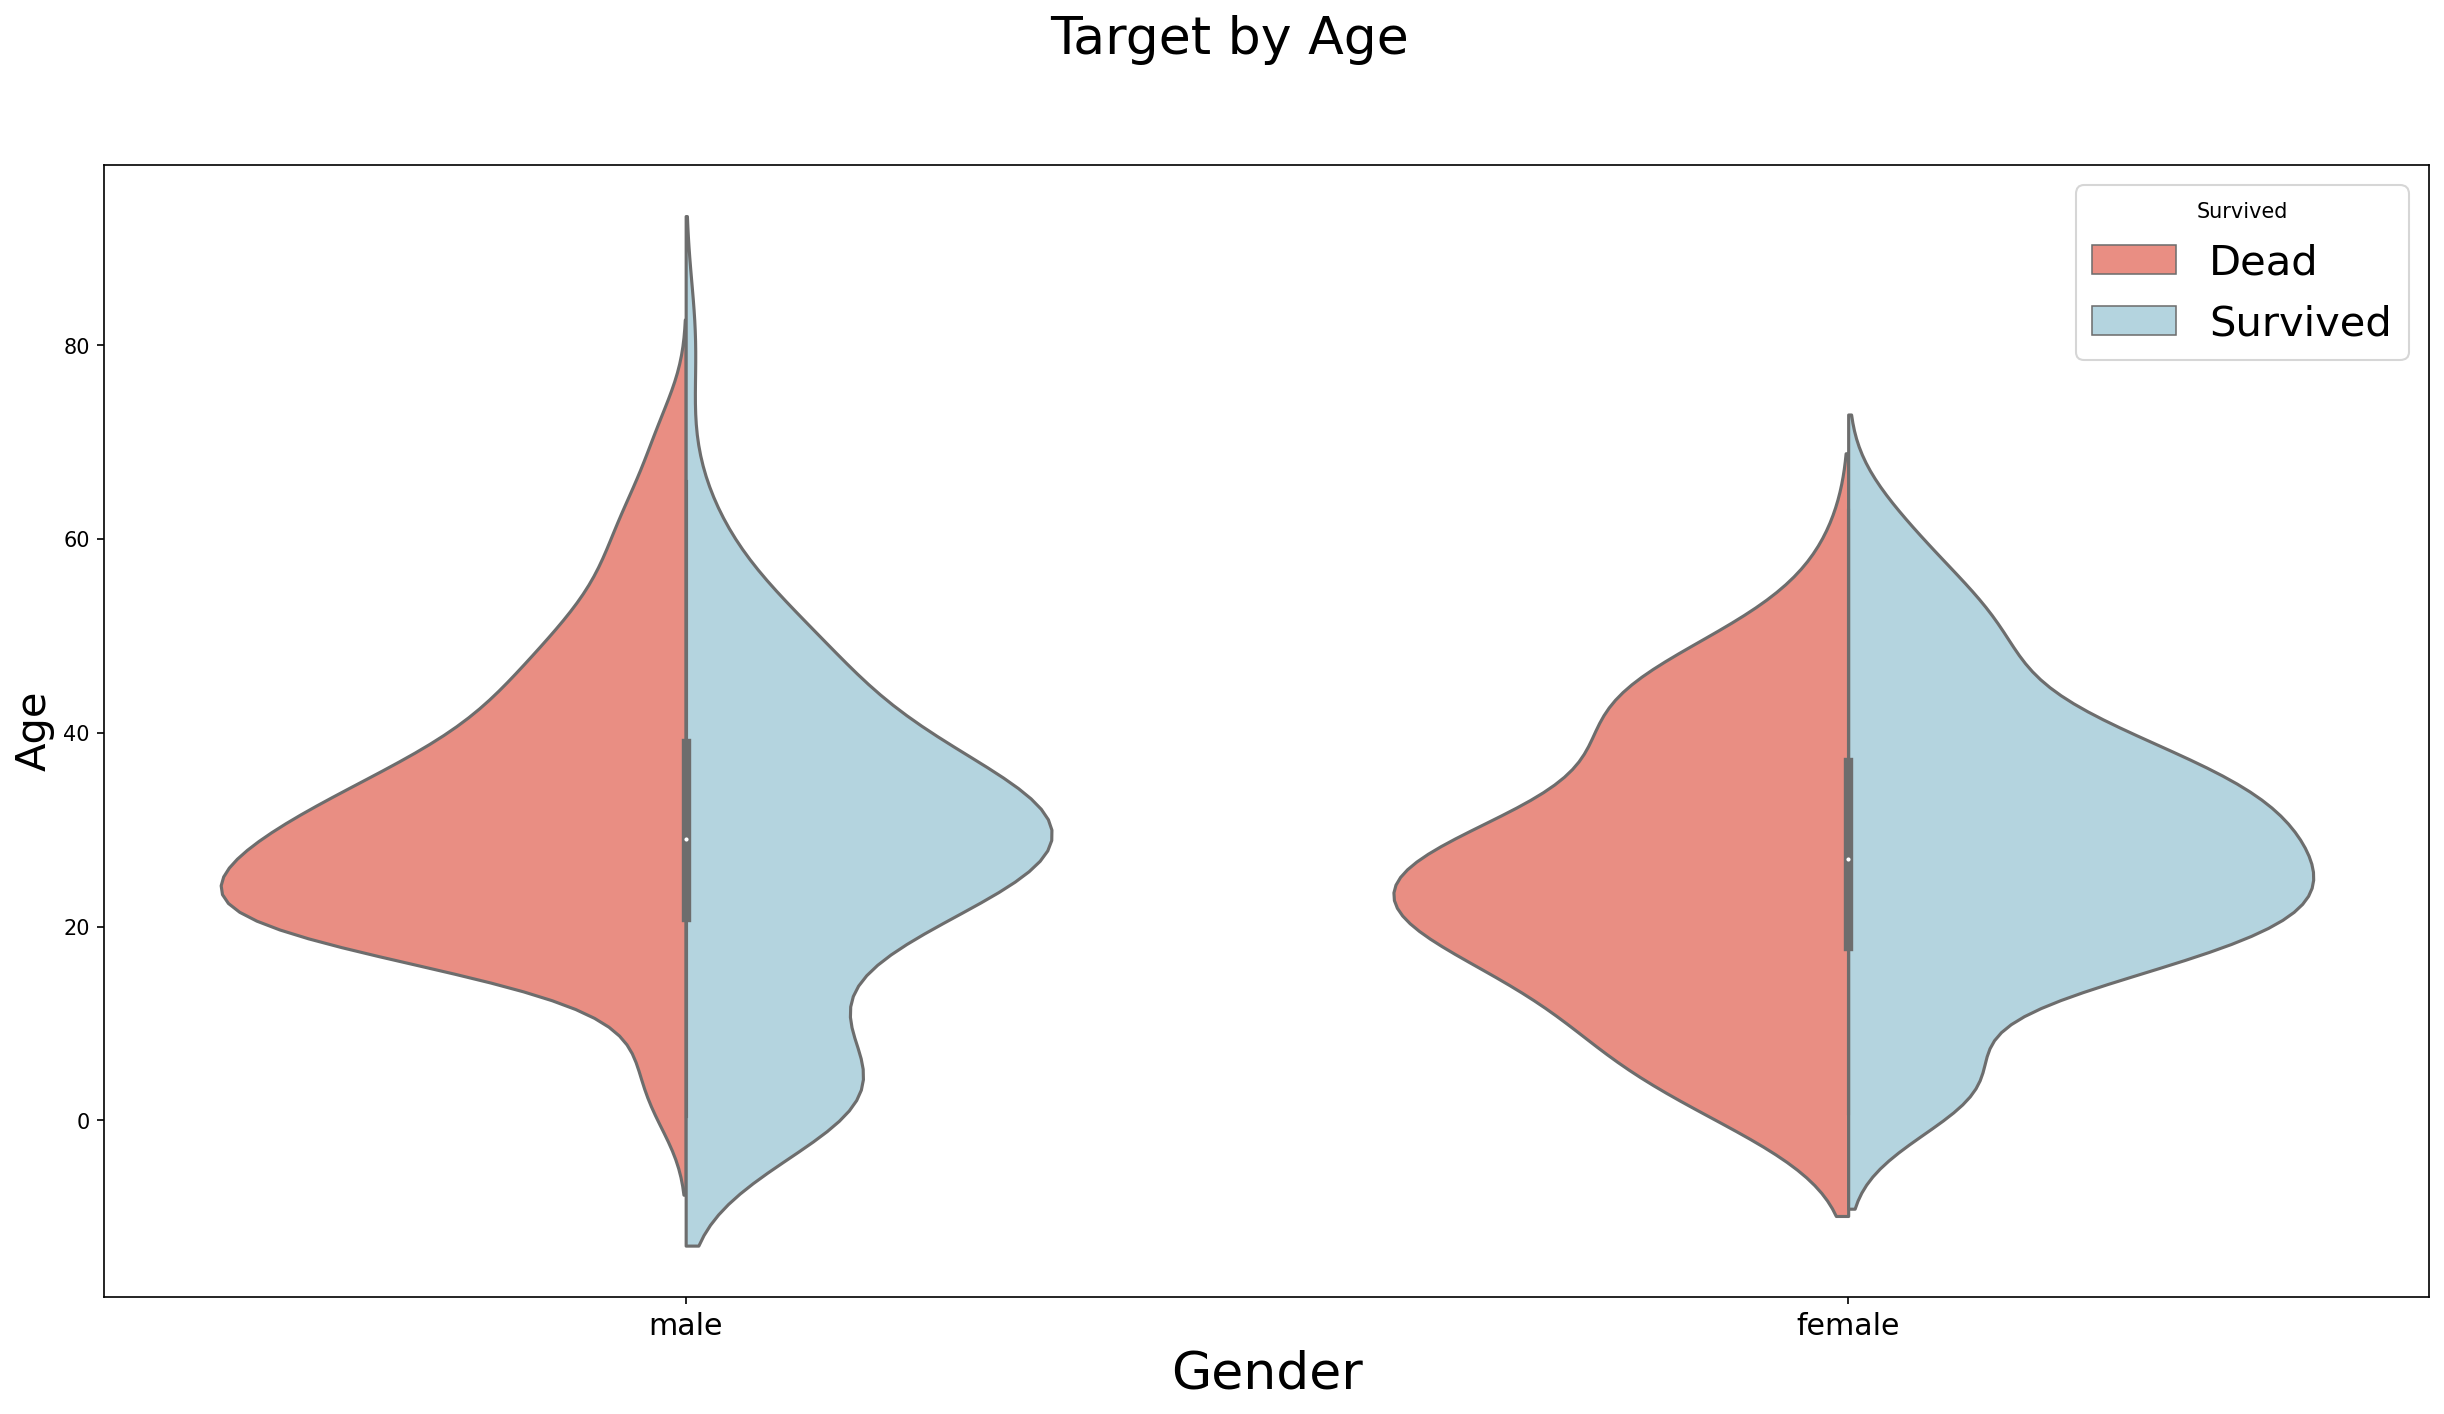

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data_violin, 
               split=True,
               palette={"Survived": "lightblue", "Dead": "salmon"}
              );
fig.suptitle("Target by Age", fontsize=25)
plt.xlabel("Gender", fontsize=25)
plt.ylabel("Age", fontsize=20);

As we saw in the chart above and validate by the following:

* Women survive more than men, as depicted by the larger female green histogram

In particular, the age conditions the survival for male passengers:

* Younger male tend to survive
* A large number of passengers between 20 and 40 succumb
* The age doesn't seem to have a direct impact on the female survival

These violin plots confirm that one old code of conduct that sailors and captains follow in case of threatening situations: 

> **Women and children first !**



### Target by Fare

Let's now focus on the Fare ticket of each passenger and see how it could impact the survival.

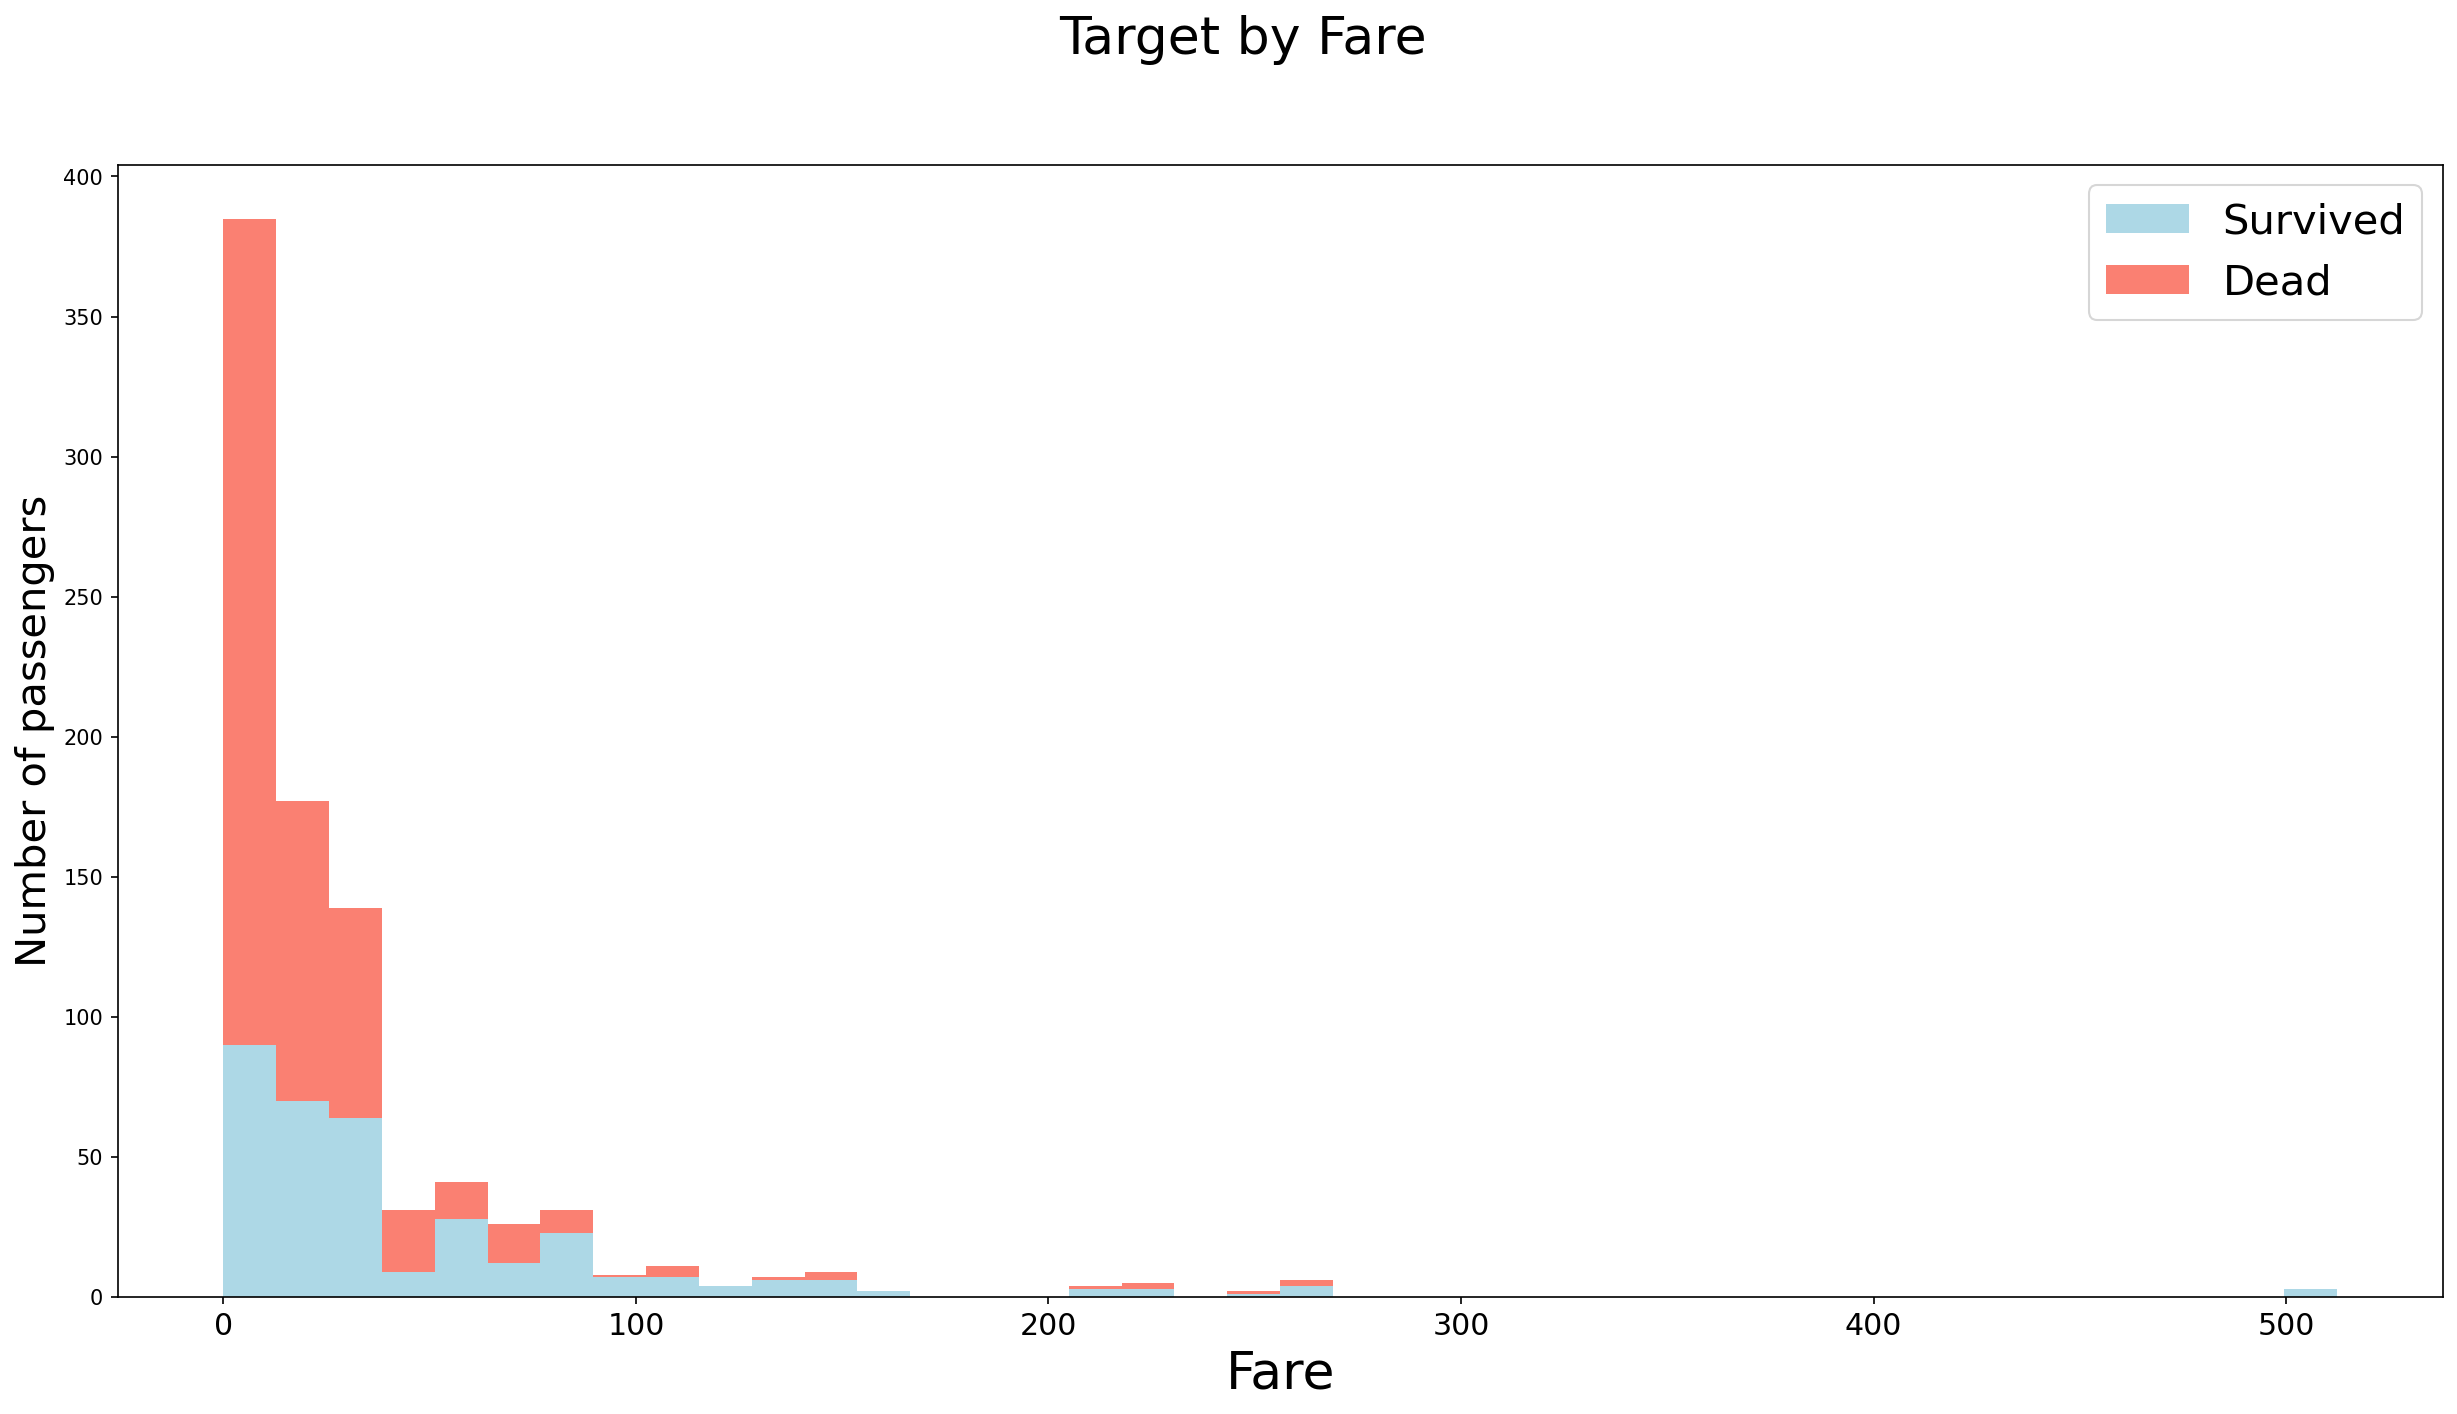

In [9]:
figure = plt.figure(figsize=(20, 10))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color=["lightblue", "salmon"],
         bins = 40, label = ['Survived','Dead'])
plt.suptitle("Target by Fare", fontsize=25)
plt.xlabel('Fare', fontsize=25)
plt.ylabel('Number of passengers', fontsize=20)
plt.legend();

Passengers with more expensive tickets, and probably a more important social status, seem to be rescued first, since passengers with cheap tickets are more likely to die.

### Target by Fare and Age

Let's now combine the age, the fare and the survival on a single chart. Our goal is to find out if they saved women and children without regarding the social status.

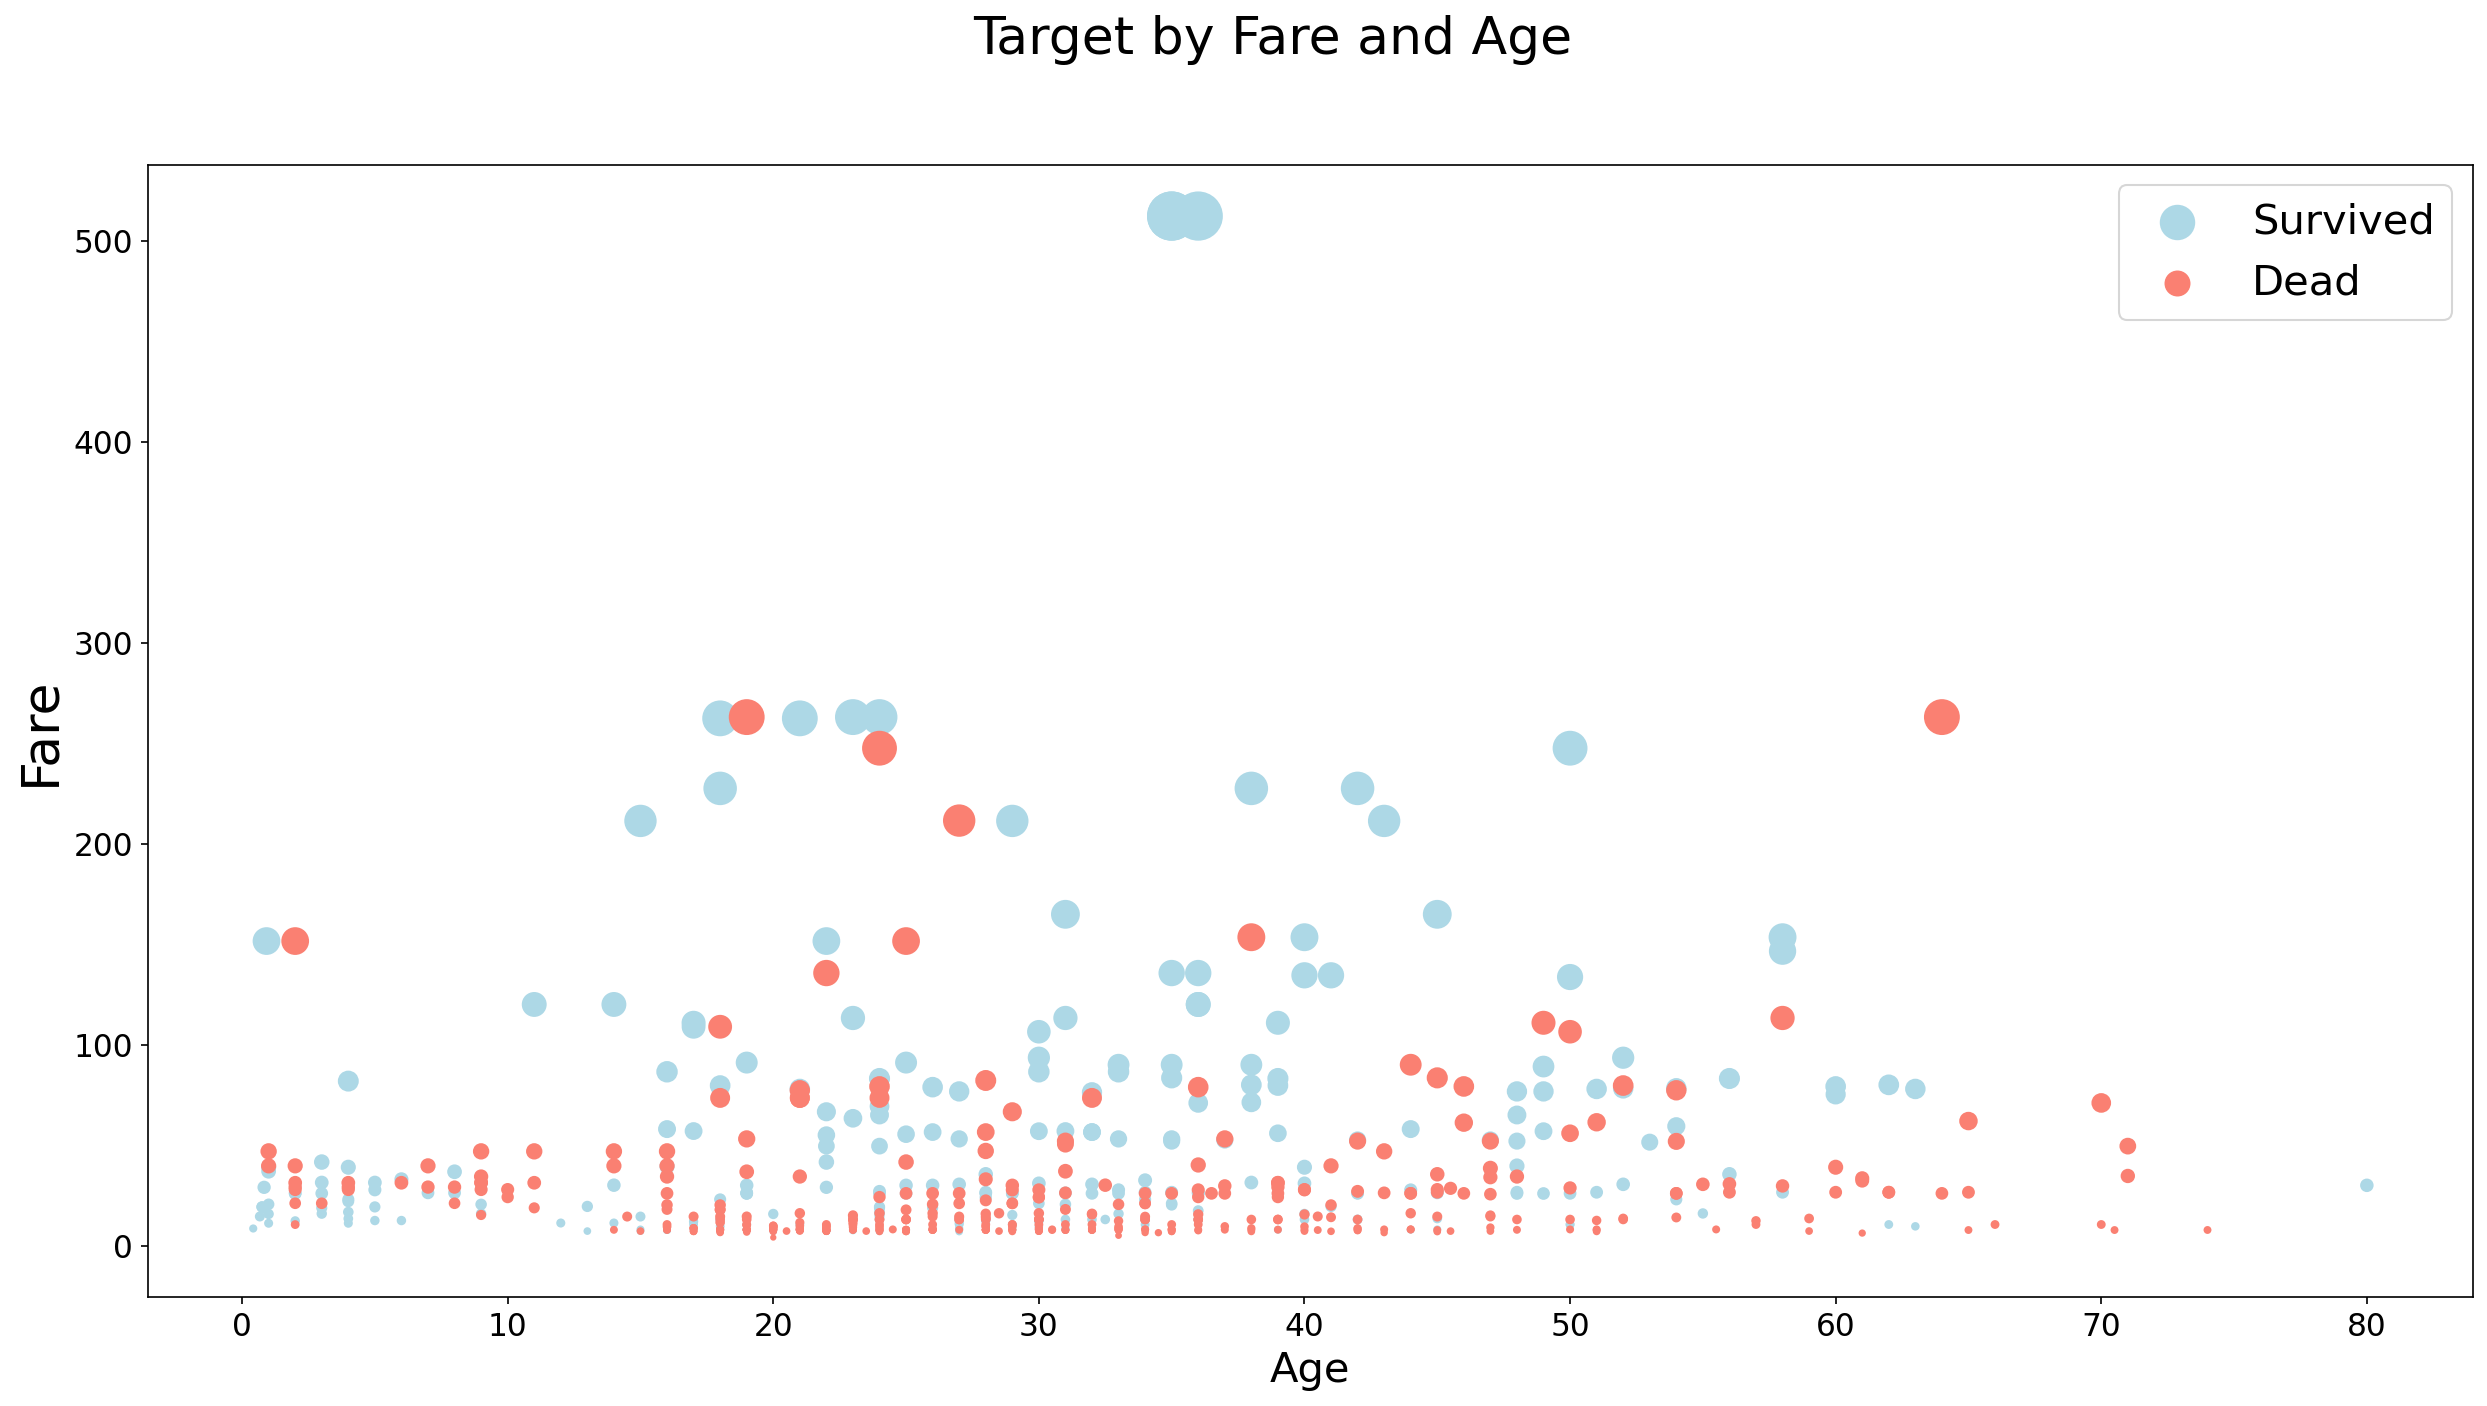

In [10]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='lightblue', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='salmon', s=data[data['Survived'] == 0]['Fare']);
plt.suptitle("Target by Fare and Age", fontsize=25)
plt.ylabel('Fare', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age', fontsize=20)
ax.legend(["Survived", "Dead"], fontsize=20);

The size of the circles is proportional to the ticket fare.

We can observe different clusters:

1. Large blue dots in `Age` between 20 and 45: adults young with the largest ticket fares survived.
2. Small salmon dots in `Age` between 10 and 45, adults from lower classes on the boat with same age as before died.
3. Small blue dots in `Age` between 0 and 7: these are the children that were saved, since *Women and children FIRST"*

We assumed the Fare is connected to the social status but how? In order to find out, we can see the correlation through the next graph, which is about the Class and Fare

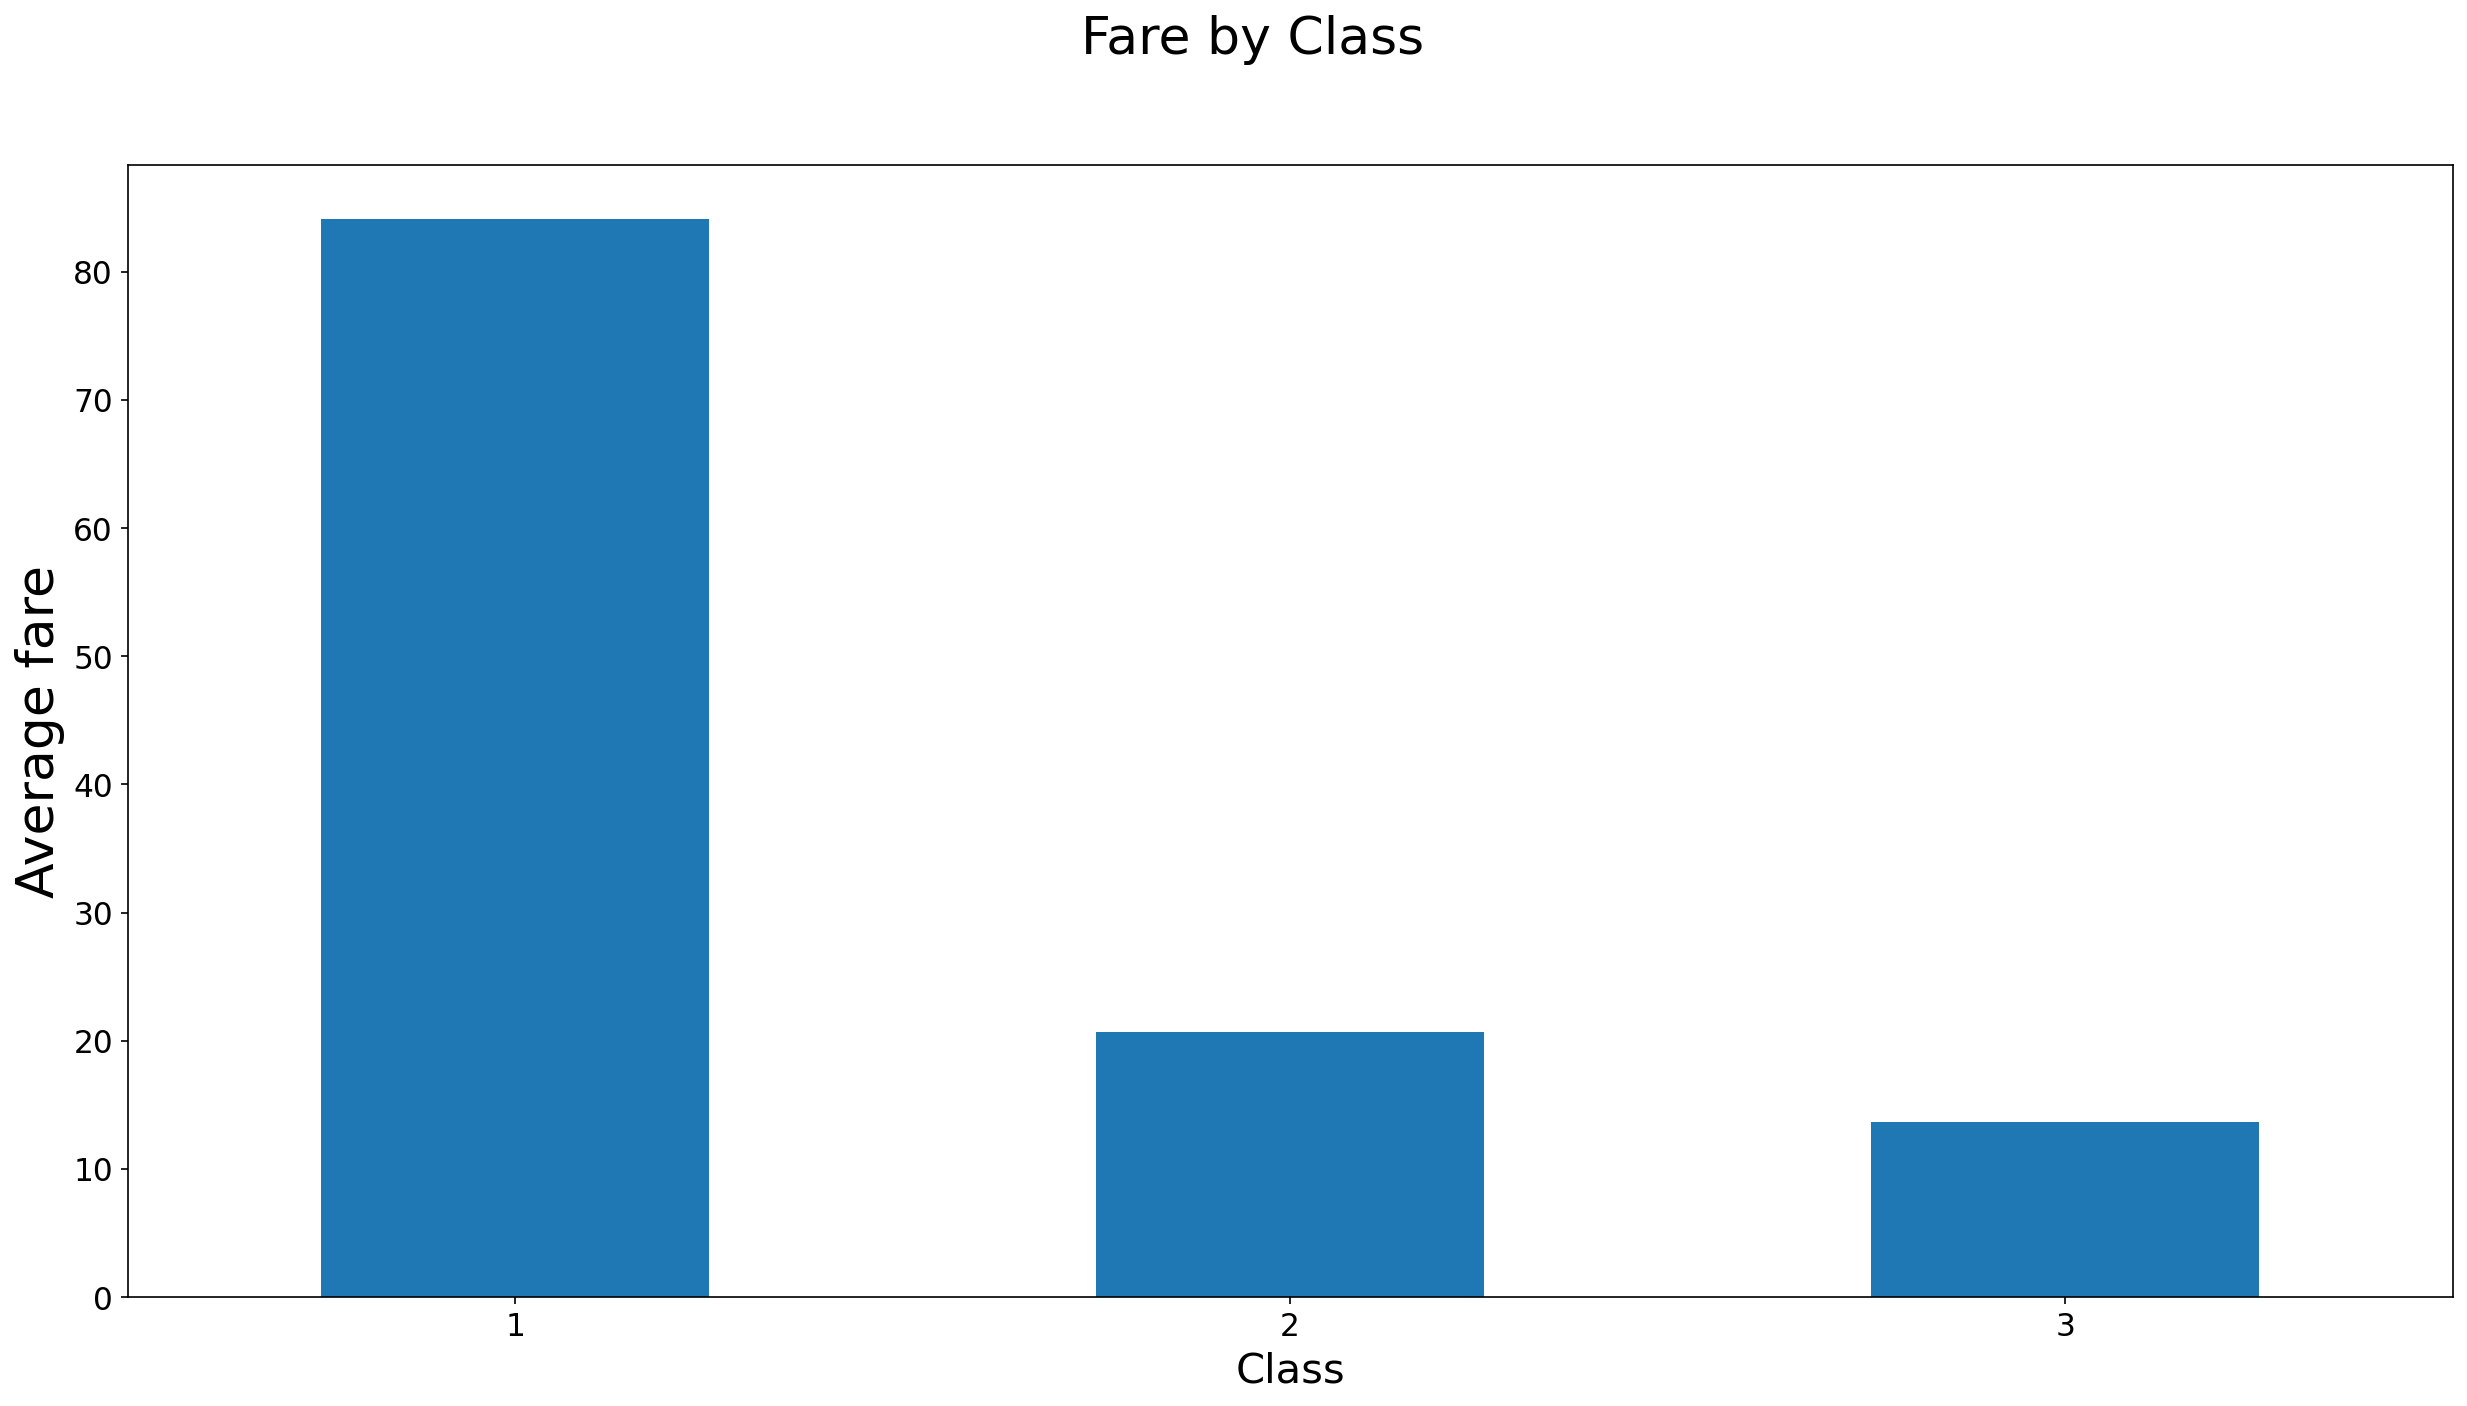

In [11]:
ax = plt.subplot()
ax.set_ylabel('Average fare', fontsize=25)
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(20, 10), ax = ax);
plt.suptitle("Fare by Class", fontsize=25)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Class', fontsize=20);

### Target by Embarkation Site

Let's now see how the embarkation site affects the survival.

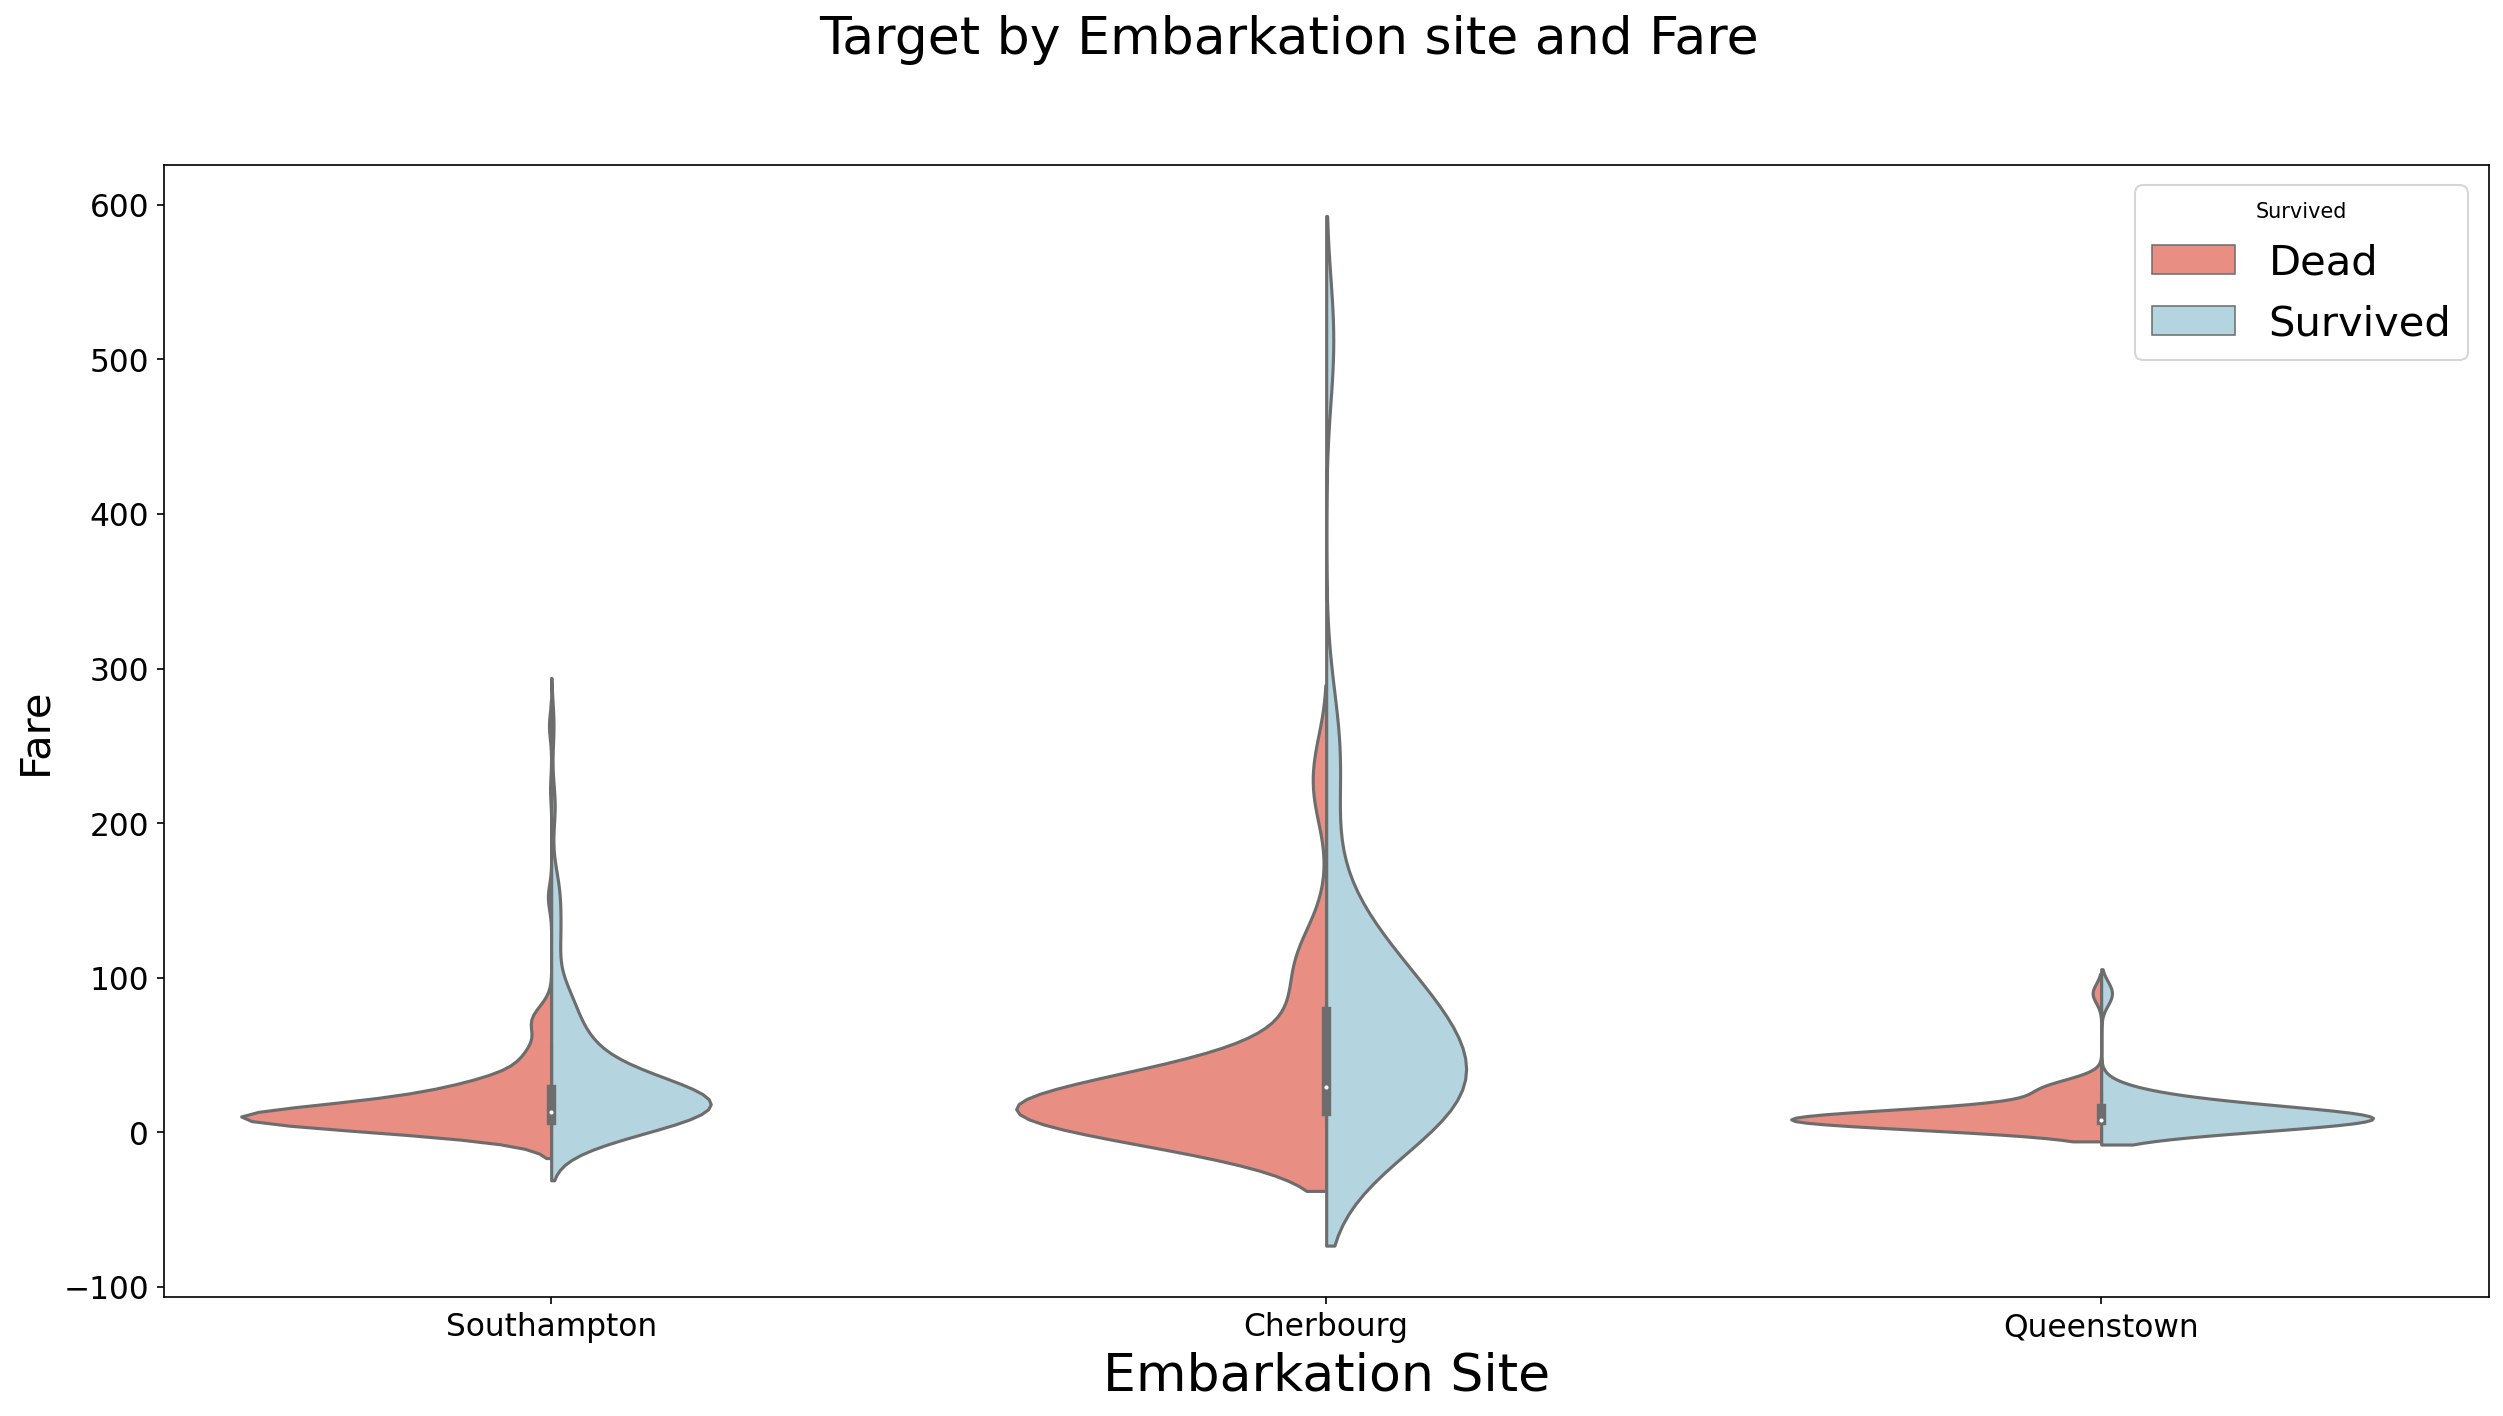

In [12]:
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='Embarked', 
               y='Fare', 
               hue='Survived', 
               data=data_violin, 
               split=True, 
               palette={"Survived": "lightblue", "Dead": "salmon"});
fig.suptitle("Target by Embarkation site and Fare", fontsize=25)
plt.xlabel("Embarkation Site", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fare", fontsize=20);

It seems that the embarkation Cherbourg have a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive. This is because Cherbourg was the main site to leave for America. 

We also see this happening in Southampton and less in Queenstown, which was the last embarkation site, hence the cheaper.

This ends the EDA.

#  Feature engineering

## Intro

In the previous part, we flirted with the data and spotted some interesting correlations.

In this part, we'll: 

* see how to process and transform these variables in such a way the data becomes manageable by a machine learning algorithm;
* create, or "engineer" additional features that will be useful in building the model;
* see along the way how to process text variables like the passenger names and integrate this information in our model;
* break our code in separate functions for more clarity.

But first, let's define a print function that asserts whether or not a feature has been processed.

In [13]:
def status(feature):
    print('Processing', feature, ': ok')

## Loading the data

One trick when starting a machine learning problem is to append the training set to the test set together.

We'll engineer new features using the train set to prevent information leakage. Then we'll add these variables to the test set.

Let's load the train and test sets and append them together.

In [14]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./data/train.csv')
    
    # reading test data
    test = pd.read_csv('./data/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [15]:
combined = get_combined_data()
print(combined.shape)

(1309, 10)


## Extracting the passenger titles

When looking at the passenger names one could wonder how to process them to extract a useful information.

If you look closely at these first examples:

* Braund, *Mr.* Owen Harris
* Heikkinen, *Miss.* Laina
* Oliva y Ocana, *Dona.* Fermina
* Peter, *Master.* Michael J

You will notice that each name has a title in it! This can be a simple *Miss.* or *Mrs.* but it can be sometimes something more sophisticated like *Master*, *Sir* or *Dona*. In that case, we might introduce an additional information about the social status by simply parsing the name and extracting the title and converting to a binary variable.

Let's first see what the different titles are in the train set

In [16]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Sir', 'Mr', 'Mlle', 'Dr', 'Mme', 'Capt', 'Rev', 'the Countess', 'Mrs', 'Miss', 'Don', 'Lady', 'Master', 'Jonkheer', 'Ms', 'Col', 'Major'}


In [17]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [18]:
def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

This function parses the names and extract the titles. Then, it maps the titles to categories of titles. We selected :
* Officer
* Royalty
* Mr
* Mrs
* Miss
* Master

In [19]:
combined = get_titles()
combined.head()

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Let's check if the titles have been filled correctly.

In [20]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


There is indeed a `NaN` value in the line 1305. In fact the corresponding name is `Oliva y Ocana, Dona. Fermina`.

This title was not found in the train dataset. Now we have an additional column called Title that contains the information.

## Processing the Age

We have seen in the first part that the Age variable was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To understand why, let's group our dataset by sex, Title and passenger class and for each subset compute the median age.

To avoid data leakage from the test set, we fill in missing ages in the train using the train set and we fill in ages in the test set using values calculated from the train set as well.

Number of missing ages in train set, Number of missing ages in test set

In [21]:
print(combined.iloc[:891].Age.isnull().sum(), end=", ")
print(combined.iloc[891:].Age.isnull().sum())

177, 86


In [22]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


This dataframe will help us impute missing age values based on different criteria.

Look at the median age column and see how this value can be different based on the `Sex`, `Pclass` and `Title` put together. For example:

* If the passenger is female, from `Pclass` 1, and from royalty the median age is 40.5.
* If the passenger is male, from `Pclass` 3, with a Mr title, the median age is 26.

Let's create a function that fills in the missing age in combined based on these different attributes.

In [23]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

combined = process_age()

Processing age : ok


The missing ages have been replaced. However, we notice a missing value in Fare, two missing values in Embarked and a lot of missing values in Cabin. We'll come back to these variables later.

In [24]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

This function drops the Name column since we won't be using it anymore because we created a Title column.

Then we encode the title values using a dummy encoding.

In [25]:
combined = process_names()
combined.head()

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


As you can see :

* There is no longer a `name` feature.
* New variables (`Title_X`) appeared. These features are binary.

For example, If `Title_Mr` = 1, the corresponding `Title` is Mr.

## Processing Fare

Let's imputed the missing fare value by the average fare computed on the train set. This function simply replaces one missing Fare value by the mean.

In [26]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

combined = process_fares()

Processing fare : ok


## Processing Embarked

This functions replaces the two missing values of Embarked with the most frequent Embarked value.

In [27]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

combined = process_embarked()

Processing embarked : ok


In [28]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


## Processing Cabin

Are this information useful in any sense?

In [29]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
print(test_cabin)

{'U', 'G', 'D', 'T', 'F', 'A', 'B', 'E', 'C'}
{'U', 'G', 'D', 'F', 'A', 'B', 'E', 'C'}


We don't have any cabin letter in the test set that is not present in the train set.

In [30]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

This function replaces `NaN` values with `U` (for `Unknow`). It then maps each Cabin value to the first letter. Then it encodes the cabin values using dummy encoding again.

In [31]:
combined = process_cabin()

Processing cabin : ok


In [32]:
# Now we fill every class
combined.isna().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
dtype: int64

## Processing Sex

Now we need to process `Sex` through dummies functions. This function maps the string values male and female to 1 and 0 respectively.

In [33]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined
combined = process_sex()

Processing Sex : ok


## Processing Pclass

In [34]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

combined = process_pclass()

Processing Pclass : ok


## Processing Ticket

Let's first see how the different ticket prefixes we have in our dataset

In [35]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [36]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))
print(len(tickets))

37


In [37]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
        
    # Extracting dummy variables from tickets:
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    status('Ticket')
    return combined

combined = process_ticket()

Processing Ticket : ok


## Processing Family

This part includes creating new variables based on the size of the family (the size is by the way, another variable we create). This creation of new variables is done under a realistic assumption: 

**Large families are grouped together, hence they are more likely to get rescued than people traveling alone.**

In [38]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

This function introduces 4 new features:

* `FamilySize` : the total number of relatives including the passenger (him/her)self.
* `Sigleton` : a boolean variable that describes families of size = 1
* `SmallFamily` : a boolean variable that describes families of 2 <= size <= 4
* `LargeFamily` : a boolean variable that describes families of 5 < size

In [39]:
combined = process_family()
print(combined.shape)

Processing family : ok
(1309, 67)


We end up with a total of 67 features.

# Modelling

## Preprocessing

In this part, we use our knowledge of the passengers based on the features we created and then build a statistical model. 

There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees.

Back to our problem, we now have to:

1. Break the combined dataset in train set and test set.
2. Use the train set to build a predictive model.
3. Evaluate the model using the train set.
4. Test the model using the test set and generate and output file for the submission.

Keep in mind that we'll have to reiterate on 2. and 3. until an acceptable evaluation score is achieved.

Let's start by importing the useful libraries.

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

To evaluate our model we'll be using a 5-fold cross validation with the accuracy since it's the metric that the competition uses in the leaderboard.

To do that, we'll define a small scoring function.

In [41]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

Recovering the train set and the test set from the combined dataset is an easy task.

In [42]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [43]:
train, test, targets = recover_train_test_target()

## Feature selection

We've come up to more than 30 features so far. This number is quite large.

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

* It decreases redundancy among the data
* It speeds up the training process
* It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [44]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(train, targets)

Let's have a look at the importance of each feature.

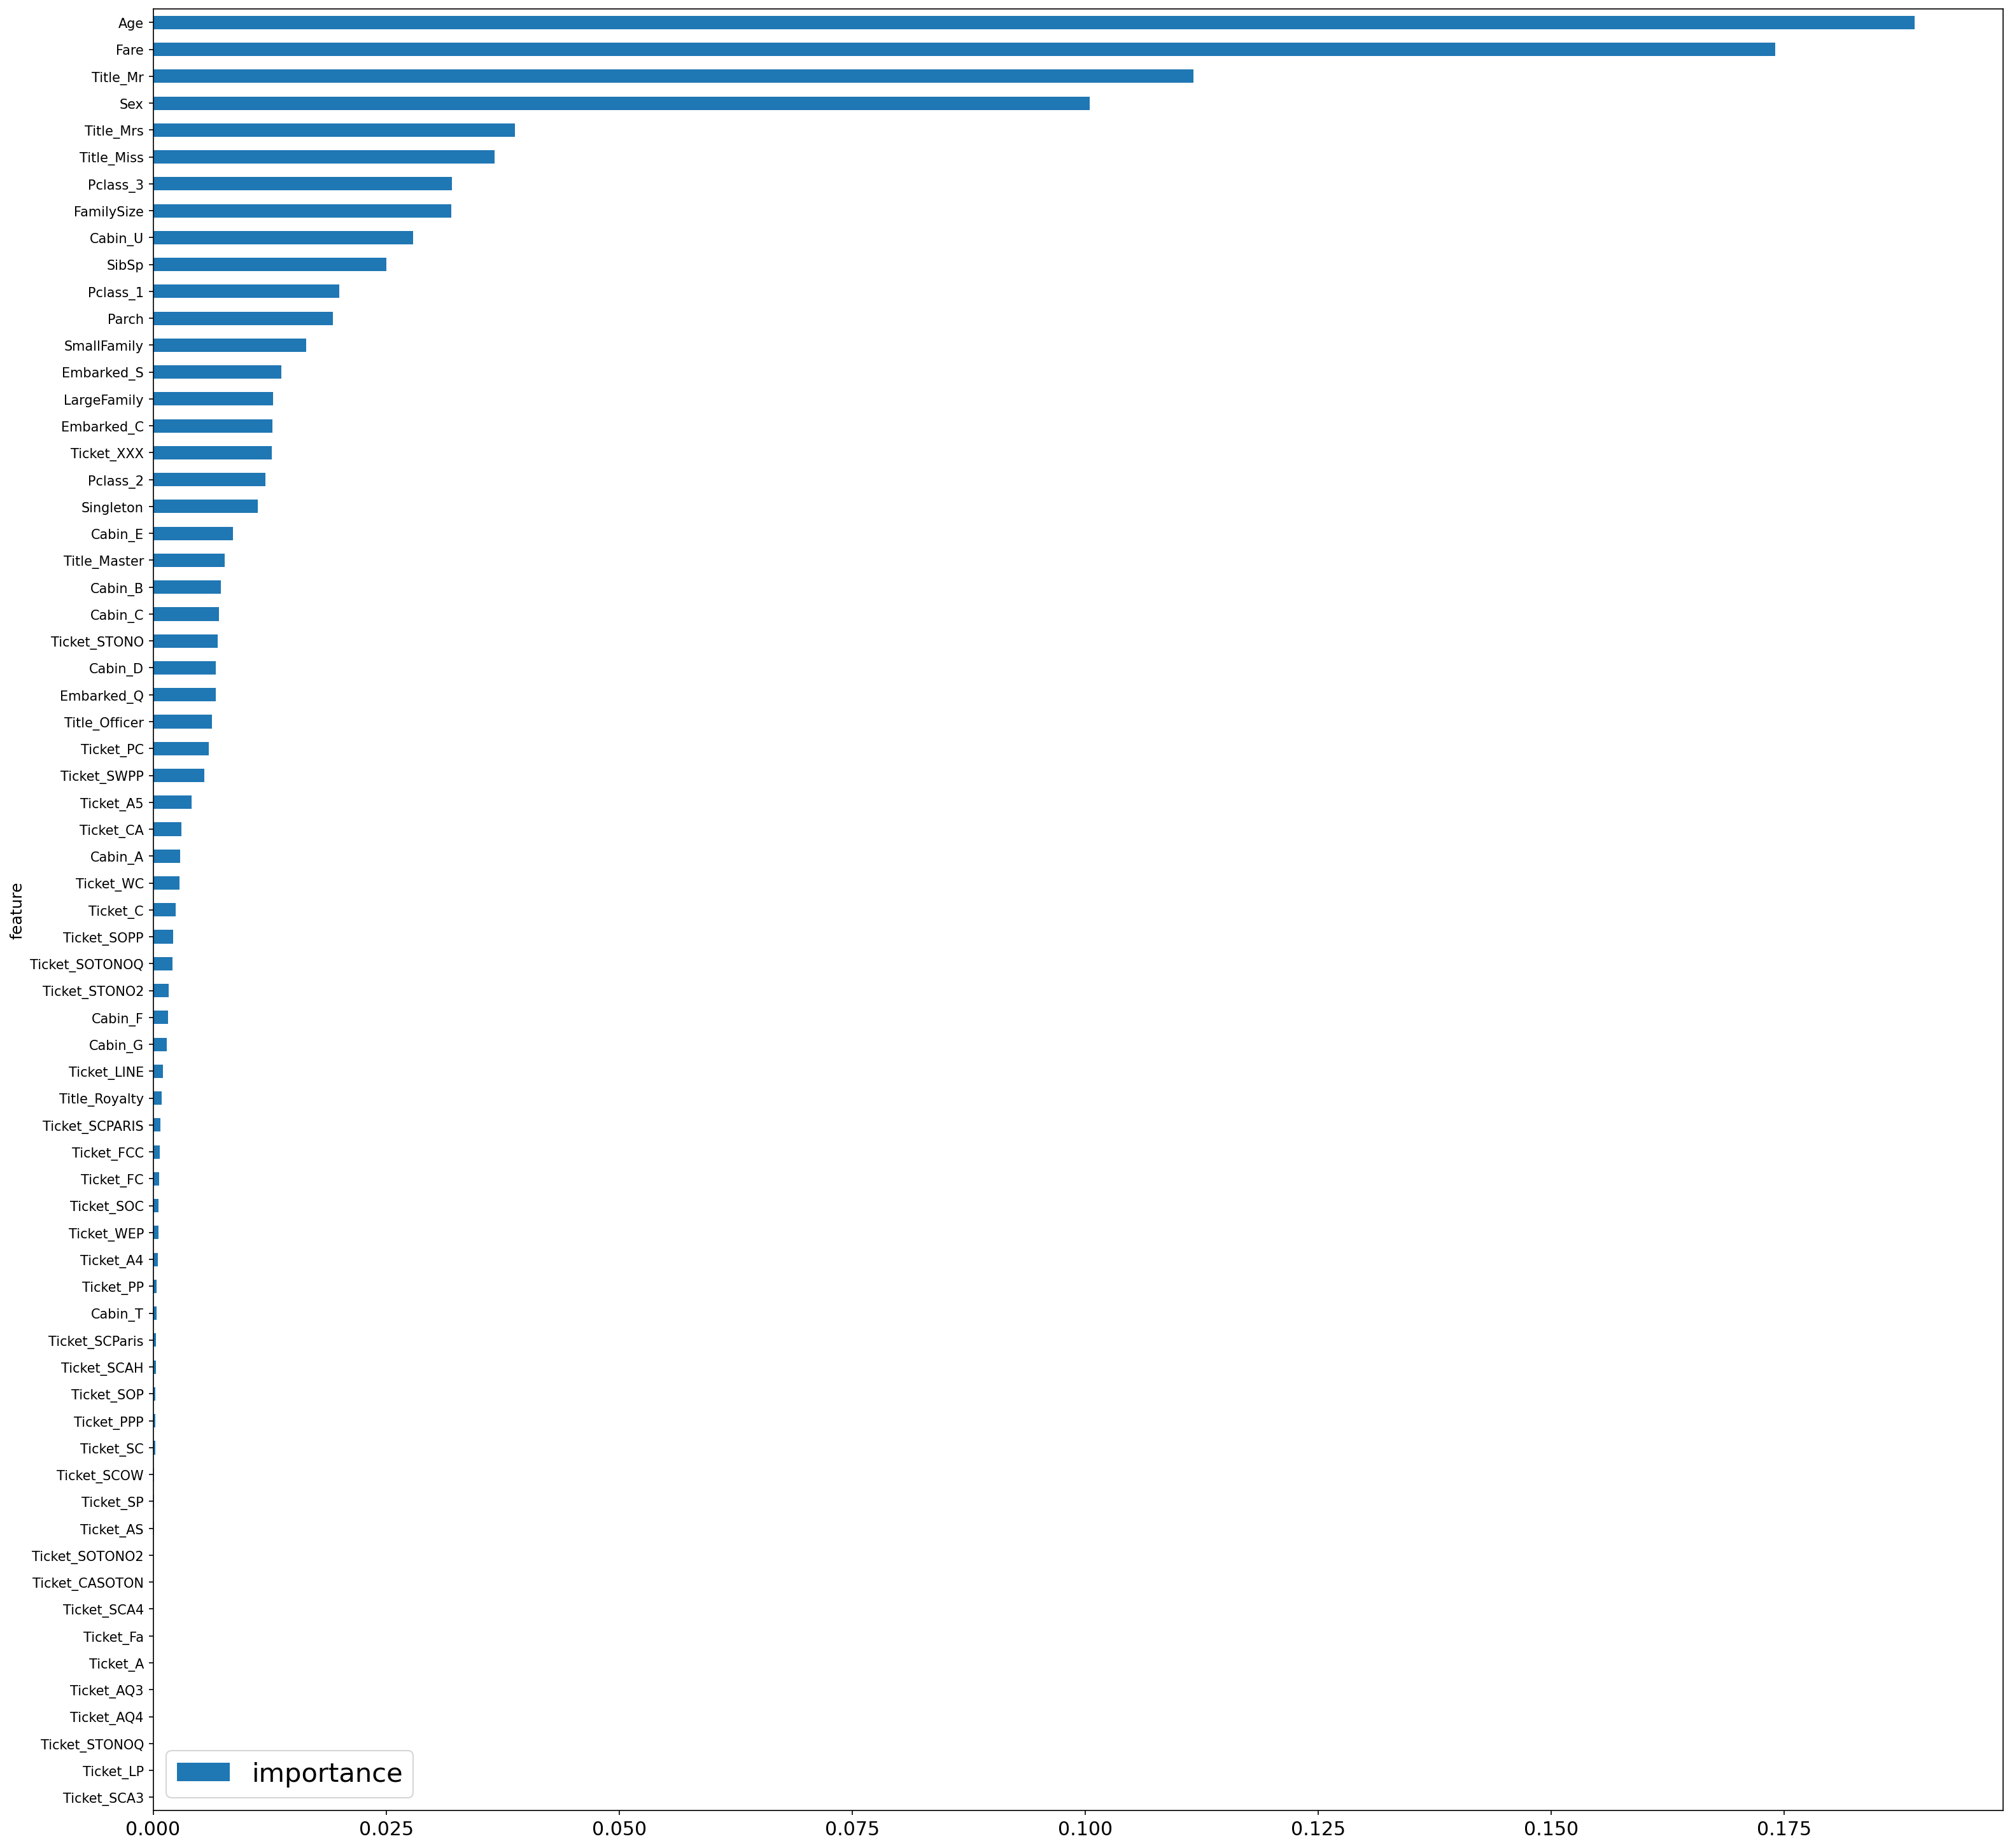

In [45]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25));

As you may notice, there is a great importance linked to `Title_Mr`, `Age`, `Fare`, and `Sex`.

There is also an important correlation with the `Passenger_Id`.

Let's now transform our train set and test set in a more compact datasets.

In [46]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape, end=", ")

test_reduced = model.transform(test)
print(test_reduced.shape)

(891, 13), (418, 13)


In [47]:
train_reduced

array([[ 1., 22.,  1., ...,  1.,  2.,  1.],
       [ 0., 38.,  1., ...,  0.,  2.,  1.],
       [ 0., 26.,  0., ...,  1.,  1.,  0.],
       ...,
       [ 0., 18.,  1., ...,  1.,  4.,  1.],
       [ 1., 26.,  0., ...,  0.,  1.,  0.],
       [ 1., 32.,  0., ...,  1.,  1.,  0.]])

## Let's try different base models

In [48]:
# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [49]:
X_train, X_test, y_train, y_test = train_test_split(train_reduced, targets, test_size=0.25)

In [50]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    np.random.seed(42)
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_test, y=y_test, scoring='accuracy')
    print('CV Train score = {0}'.format(score))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV Val score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV Train score = 0.8566666666666667
CV Val score = 0.8067781393782963
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV Train score = 0.8521212121212122
CV Val score = 0.8082706766917293
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV Train score = 0.8067676767676769
CV Val score = 0.7978902480080798
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV Train score = 0.8250505050505049
CV Val score = 0.8083043429469194
****


## Hyperparameters tuning

As mentioned in the beginning of the Modeling part, we will be using a Random Forest model. It may not be the best model for this task but we'll show how to tune. This work can be applied to different models.

Random Forest are quite handy. They do however come with some parameters to tweak in order to get an optimal model for the prediction task.

Additionally, we'll use the full train set.

In [51]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Now that the model is built by scanning several combinations of the hyperparameters, we can generate an output file to submit on Kaggle.

In [52]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission/gridsearch_rf.csv', index=False)

FINAL RESULT: 78,947% IS THE ACCURACY FOUND. 

# My experiments

## Validation Dataset

Now, using this more updated dataset, I'll try different ways to see if I can improve the result obtained in the website as I already did before. In particular, now I have:
* `train`: Train dataset with 67 attributes due to the pandas dummies columns
* `targets`: Train target (Survived or no?)
* `test`: Test dataset with 67 attributes as Train without targets (they are on Kaggle)

Now I use a Validation dataset of 25% through `train_test_split()` of Scikit-Learn, obtaining:
* `X_train,y_train`: New restricted Train dataset and its targets
* `X_test,y_test`: New Validation dataset with its targets

In [53]:
train.shape, targets.shape, test.shape

((891, 67), (891,), (418, 67))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 67), (223, 67), (668,), (223,))

## Feature Selection

In [55]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(train, targets)
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
# features.set_index('feature', inplace=True)

As said before, 67 attributes are too many, they make the machine learning algorithm overfit, therefore we need to implement a new solution in order to make better predictions. 

In [56]:
features.head(1).importance.sum(), features.head(13).importance.sum(), features.head(20).importance.sum(), features.head(25).importance.sum()

(0.19171614860259398,
 0.8237336216341414,
 0.9065995813428905,
 0.9435265691813226)

We can see that:

* `Age` and `Fare` together make the 36% of all Feature importance, in particular `Age` standalone make almost 20%;
* The first 13/67 elements chosen in the previous case were 82% of all Feature importance;
* 20/67 are 90%, 25/67 95%;

In this case, we try 20, i.e. 90% of the feature importance. They are:

In [57]:
feature_list = list(features.head(20)["feature"])
feature_list

['Age',
 'Fare',
 'Title_Mr',
 'Sex',
 'Title_Mrs',
 'Pclass_3',
 'Title_Miss',
 'FamilySize',
 'Cabin_U',
 'SibSp',
 'Pclass_1',
 'Parch',
 'SmallFamily',
 'LargeFamily',
 'Embarked_S',
 'Ticket_XXX',
 'Embarked_C',
 'Pclass_2',
 'Cabin_E',
 'Title_Master']

In [58]:
new_train = train[feature_list] 
new_test = test[feature_list]

In [59]:
new_train

,Age,Fare,Title_Mr,Sex,Title_Mrs,Pclass_3,Title_Miss,FamilySize,Cabin_U,SibSp,Pclass_1,Parch,SmallFamily,LargeFamily,Embarked_S,Ticket_XXX,Embarked_C,Pclass_2,Cabin_E,Title_Master
0,22.0,7.2500,1,1,0,1,0,2,1,1,0,0,1,0,1,0,0,0,0,0
1,38.0,71.2833,0,0,1,0,0,2,0,1,1,0,1,0,0,0,1,0,0,0
2,26.0,7.9250,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0
3,35.0,53.1000,0,0,1,0,0,2,0,1,1,0,1,0,1,1,0,0,0,0
4,35.0,8.0500,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0
887,19.0,30.0000,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0
888,18.0,23.4500,0,0,0,1,1,4,1,1,0,2,1,0,1,0,0,0,0,0
889,26.0,30.0000,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0


In [60]:
new_test.reindex(np.linspace(0,418,1))
new_test.index = pd.RangeIndex(start=0, stop=418, step=1)
new_test

,Age,Fare,Title_Mr,Sex,Title_Mrs,Pclass_3,Title_Miss,FamilySize,Cabin_U,SibSp,Pclass_1,Parch,SmallFamily,LargeFamily,Embarked_S,Ticket_XXX,Embarked_C,Pclass_2,Cabin_E,Title_Master
0,34.5,7.8292,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,47.0,7.0000,0,0,1,1,0,2,1,1,0,0,1,0,1,1,0,0,0,0
2,62.0,9.6875,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
3,27.0,8.6625,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
4,22.0,12.2875,0,0,1,1,0,3,1,1,0,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,26.0,8.0500,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
414,39.0,108.9000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
415,38.5,7.2500,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
416,26.0,8.0500,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0


In [61]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(new_train, targets, test_size=0.25)

## First Try with different methods

Now I'll try different approaches to this method, in order to have a baseline idea and work on that. The methods are:
* `LogisticRegression()`
* `LogisticRegressionCV()`
* `RandomForestClassifier()`
* `GradientBoostingClassifier()`

In [62]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    np.random.seed(42) # I need the same starting point
    print('Cross-validation of : {0}'.format(model.__class__))
    model.fit(X_train, y_train)
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV Train score = {0}'.format(score))
    score = compute_score(clf=model, X=X_test, y=y_test, scoring='accuracy')
    print('CV Validation score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV Train score = 0.8323532712377961
CV Validation score = 0.8250505050505051
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV Train score = 0.8323532712377959
CV Validation score = 0.8294949494949495
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV Train score = 0.8130063965884862
CV Validation score = 0.8381818181818183
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV Train score = 0.8233980473571989
CV Validation score = 0.8114141414141415
****


As baseline result we can see that `RandomForestClassifier()` is the best at the first attempt with the new dataset, as before, even though the results obtained are slightly different than before. We'll now dive a little into the problem.

## Hyperparameter Research
### RandomizedSearchCV

We'll now do a selection of the various method we proposed. Surfing the Net, we found the meaning of the main hyperparameters. In this section we try some combinations in order to understand better on which model we need to focus our attentions. We now define different grid of hyperparameters for each algorithm that later we'll apply.

In [63]:
# Create an hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-5, 5, 200), 
                "dual":[True, False],
                "fit_intercept":[True, False],
                "penalty" : ['l1', 'l2', 'elasticnet'],
                "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create an hyperparameter grid for Logistic Regression CV 
log_reg_CV_grid = {"Cs":[1, 3, 5, 7, 10, 12], 
                   "fit_intercept":[True, False],
                   "dual":[True, False],
                   "penalty" : ['l1', 'l2', 'elasticnet'],
                   "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create an hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10, 1000, 100), 
           "max_depth":[None, 3, 5, 7], 
           "bootstrap":[True, False],
           "max_features": ['sqrt', 'auto', 'log2'],
           "min_samples_split":np.arange(2, 20, 1), 
           "min_samples_leaf":np.arange(1, 20, 1)}

# Create an hyperparameter grid for Gradiet Boosting Classifier
gb_grid = {"loss":['exponential', 'deviance'],
           "learning_rate":[0.1, 0.05], 
           "max_depth":[None, 1, 3], 
           "n_estimators":np.arange(10, 1000, 20), 
           "min_samples_split":np.arange(2, 10, 1), 
           "min_samples_leaf":np.arange(1, 5, 1)}

rs_log_reg = LogisticRegression()
rs_lo_re_cv = LogisticRegressionCV()
rs_ran_for = RandomForestClassifier()
rs_gra_boo = GradientBoostingClassifier()

In [64]:
models = [
    [LogisticRegression(), log_reg_grid, "Logistic Regression", rs_log_reg, 1000],
    [LogisticRegressionCV(), log_reg_CV_grid, "Logistic Regression CV", rs_lo_re_cv, 1000],
    [RandomForestClassifier(), rf_grid, "Random Forest Classifier", rs_ran_for, 1000],
    [GradientBoostingClassifier(), gb_grid, "Gradient Boosting", rs_gra_boo, 1000]
]

In [66]:
for model in models:
    # Let's use it
    np.random.seed(42)
    # Setup random parameters 
    model[3] = RandomizedSearchCV(model[0], 
                                param_distributions=model[1], 
                                # scoring='average_precision_score',
                                n_iter=model[4], 
                                cv=5,
                                verbose=True, 
                                n_jobs=-1)
    # fit random hyperparameters
    model[3].fit(X_train, y_train)
    print('*************************')
    print(model[2])
    print('*************************')
    print(model[3].score(X_train, y_train))
    print(model[3].score(X_test, y_test))
    # print(np.mean(cross_val_score(model[3], X_train, y_train, cv=3, scoring="accuracy", verbose=1)))
    # print(np.mean(cross_val_score(model[3], X_test, y_test, cv=3, scoring="accuracy", verbose=1)))
    print('*************************\n')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4264 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.0s


*************************
Logistic Regression
*************************
0.844311377245509
0.8295964125560538
*************************

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done 1394 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


*************************
Logistic Regression CV
*************************
0.8458083832335329
0.8161434977578476
*************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  9.0min finished


*************************
Random Forest Classifier
*************************
0.8577844311377245
0.8295964125560538
*************************

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 15.6min finished


*************************
Gradient Boosting
*************************
0.9491017964071856
0.820627802690583
*************************



Between the four models we chose two of them, since they seem to behave better. 

Between the two logistic regression models, we select the Cross Validation one, since it gives a more realistic result even though they score the same precision.

The random forest model is the best one between our approaches, since is the highest accuracy with the least overfit. 

Regarding the Gradient Boosting model, the overfit generated is remarkable, since the accuracy difference between Train and Validation is 12%; therefore we chose to not pursue this model.

Let's see the best parameters obtained:

In [67]:
log_reg_CV = models[1][3]
log_reg_CV.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'fit_intercept': False,
 'dual': True,
 'Cs': 3}

In [68]:
rand_fores = models[2][3]
rand_fores.best_params_

{'n_estimators': 110,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': True}

### GridSearchCV

Now we'll focus, as already said, in a diver search of hyperparameters for the two chosen model, `LogisticRegressionCV()` and `RandomForestClassifier()`, through `GridSearchCV()`.

We now update our grids.

In [107]:
# Create an hyperparameter grid for Logistic Regression CV - GridSearchCV Version
log_reg_CV_grid_gscv = {"Cs":[np.logspace(-1, 1, 30).tolist(), 1, 3, 5, 7, 10, 12], 
                        "fit_intercept":[True, False],
                        "dual":[True, False],
                        "penalty" : ['l1', 'l2', 'elasticnet'],
                        "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create an hyperparameter grid for Random Forest Classifier
rf_grid_gscv = {"n_estimators":np.arange(10, 150, 10), 
                "max_depth":[4, 6, 8, 10], 
                'max_features': ['auto', 'sqrt', 'log2'],
                "min_samples_split":np.arange(6, 10, 2), 
                "min_samples_leaf":np.arange(6, 10, 2)}

rs_lo_re_cv_gscv = LogisticRegressionCV()
rs_ran_for__gscv = RandomForestClassifier()

cross_validation = StratifiedKFold(n_splits=5)

In [108]:
models_gs = [
    [LogisticRegressionCV(), log_reg_CV_grid_gscv, "Logistic Regression CV", rs_lo_re_cv_gscv],
    [RandomForestClassifier(), rf_grid_gscv, "Random Forest Classifier", rs_ran_for__gscv]
]

In [109]:
for model in models_gs:
    np.random.seed(42)
    model[3] = GridSearchCV(model[0], param_grid=model[1], cv=cross_validation, verbose=True, n_jobs=-1)
    # fit random hyperparameters
    model[3].fit(X_train, y_train)
    print('*************************')
    print(model[2])
    print('*************************')
    print(model[3].score(X_train, y_train))
    print(model[3].score(X_test, y_test))
    print('*************************\n')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   51.2s finished


*************************
Logistic Regression CV
*************************
0.8473053892215568
0.8161434977578476
*************************

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   54.8s


*************************
Random Forest Classifier
*************************
0.8682634730538922
0.8161434977578476
*************************



[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  1.2min finished


In [110]:
log_reg_CV = models_gs[0][3]
log_reg_CV.best_params_

{'Cs': 12,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [111]:
rand_for_gs = models_gs[1][3]
rand_for_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 30}

Ok, let's compare the best result obtained with the other already obtained.

In [93]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
np.random.seed(42)
author_model = RandomForestClassifier(**parameters)
author_model.fit(X_train, y_train)

print('************************* Author Random Forest')
print(author_model.score(X_train, y_train))
print(author_model.score(X_test, y_test))

print('************************* Updated Random Forest')
print(rand_for_gs.score(X_train, y_train))
print(rand_for_gs.score(X_test, y_test))


************************* Author Random Forest
0.8652694610778443
0.8251121076233184
************************* Updated Random Forest
0.8562874251497006
0.8385650224215246


> Okay, We have a better result on the validation dataset!!!! 

Let's see what is the result on Kaggle!

In [91]:
output = rand_for_gs.predict(new_test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission/my_try.csv', index=False)

In [92]:
df_output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Unfortunately, we haven't outcome our goal. We reached a very good result, 78.45%. 

> We will try to modify the parameters manually to check the sensibility of the parameters and to find the correct ones. 

In [156]:
rand_for_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 30}

In [346]:
# Here will be the baseline 
parameters = {'bootstrap': False,
              'max_depth': 10,
              'max_features': 'auto',
              'criterion':'gini',
              'min_samples_leaf': 6,
              'min_samples_split': 12,
              'n_estimators': 1000}
np.random.seed(42)
last_model = RandomForestClassifier(**parameters)
last_model.fit(X_train, y_train)

print('************************* Manual Random Forest')
print(last_model.score(X_train, y_train))
print(last_model.score(X_test, y_test))

************************* Manual Random Forest
0.874251497005988
0.8385650224215246


In [352]:
# Here we will be changing the baseline 
parameters = {'bootstrap': False,
              'max_depth': 10,
              'max_features': 'auto',
              'criterion':'gini',
              'min_samples_leaf': 6,
              'min_samples_split': 12,
              'n_estimators': 1000,
              'min_impurity_decrease':0.02
             }
np.random.seed(42)
last_model = RandomForestClassifier(**parameters)
last_model.fit(X_train, y_train)

print('************************* Manual Random Forest')
print(last_model.score(X_train, y_train))
print(last_model.score(X_test, y_test))

************************* Manual Random Forest
0.811377245508982
0.8116591928251121


In [347]:
preds1 = last_model.predict(new_test).astype(int)

In [353]:
preds2 = last_model.predict(new_test).astype(int)

In [354]:
preds1 == preds2

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [343]:
output = last_model.predict(new_test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('submission/gradboos_rf.csv', index=False)

### Conclusion

We have reached very good results using some Scikit-Learn functions. The goal was to obtain a better result than the other author. We obtained some good points of view on the problem and found a way to replicate the author result using a strategy that does not depend on the problem. We set a baseline that we'll try to improve. 